In [1]:
!conda install -c conda-forge pandas-profiling -y  

Fetching package metadata ...............
Solving package specifications: .

Package plan for installation in environment D:\Mallikarjun\UPXAcademylearning\Anaconda:

The following NEW packages will be INSTALLED:

    ca-certificates:  2018.4.16-0   conda-forge
    pandas-profiling: 1.4.1-0       conda-forge
    vc:               14-0          conda-forge

The following packages will be UPDATED:

    conda:            4.3.14-py36_1             --> 4.5.6-py36_0  conda-forge
    freetype:         2.5.5-vc14_2              --> 2.8.1-vc14_0  conda-forge [vc14]
    icu:              57.1-vc14_0               --> 58.2-vc14_0   conda-forge [vc14]
    jpeg:             9b-vc14_0                 --> 9b-vc14_2     conda-forge [vc14]
    libpng:           1.6.27-vc14_0             --> 1.6.34-vc14_0 conda-forge [vc14]
    libtiff:          4.0.6-vc14_3              --> 4.0.9-vc14_0  conda-forge [vc14]
    openssl:          1.0.2k-vc14_0             --> 1.0.2o-vc14_0 conda-forge [vc14]
    pycosat:

!pip install missingnoFetching package metadata .............
Solving package specifications: .

Package plan for installation in environment C:\Program Files\Anaconda3:

The following NEW packages will be INSTALLED:

    ca-certificates:  2018.4.16-0   conda-forge
    pandas-profiling: 1.4.1-0       conda-forge
    vc:               14-0          conda-forge

The following 

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from __future__ import absolute_import,division,print_function

In [3]:
print (11/4)

2.75


In [5]:
!pip install tqdm

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# ___future__ is used to offer backward compatibility. This makes the functions like print to work with python 2.0 also
from __future__ import absolute_import ,division,print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
sns.set_context("poster",font_scale=1.3)

import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

In [7]:
def save_subgroup(dataframe,col_index,subgroup_name,prefix="raw"):
    subgroup_filename="_".join([prefix,subgroup_name,".csv.gz"])
    dataframe.to_csv(subgroup_filename,compression="gzip",encoding="UTF-8")
    test_dataframe=pd.read_csv(subgroup_filename,compression="gzip",index_col=col_index,encoding="UTF-8")
    if (test_dataframe.equals(dataframe)):
        print ("Successfull saved and validated the dataframe")
    else:
        print ("Warning--Equivalence test failed-Data frame saves is not same as input dataframe")
    

In [8]:
def Load_dataframe(filename,col_index=[0]):
    dataframe=pd.read_csv(filename,compression="gzip",index_col=col_index)
    return dataframe

In [9]:
players=Load_dataframe("raw_players_.csv_gz")

In [10]:
players.head()

birthday  height  weight              position  \
playerShort                                                                
aaron-hughes            08.11.1979   182.0    71.0           Center Back   
aaron-hunt              04.09.1986   183.0    73.0  Attacking Midfielder   
aaron-lennon            16.04.1987   165.0    63.0      Right Midfielder   
aaron-ramsey            26.12.1990   178.0    76.0     Center Midfielder   
abdelhamid-el-kaoutari  17.03.1990   180.0    73.0           Center Back   

                        rater1  rater2  
playerShort                             
aaron-hughes              0.25    0.00  
aaron-hunt                0.00    0.25  
aaron-lennon              0.25    0.25  
aaron-ramsey              0.00    0.00  
abdelhamid-el-kaoutari    0.25    0.25

In [11]:
players.shape

(2053, 6)

In [12]:
ls

 Volume in drive D is Sasken Data
 Volume Serial Number is 3E3D-0ACB

 Directory of D:\Mallikarjun\UPXAcademylearning\Jupyter\DataScience

11-07-2018  11:22    <DIR>          .
11-07-2018  11:22    <DIR>          ..
11-07-2018  01:07    <DIR>          .ipynb_checkpoints
09-07-2018  23:49            99,365 1-Redcard-Dataset.ipynb
09-07-2018  23:04         1,989,050 2-Redcard-Players.ipynb
10-07-2018  14:40            56,735 3-Redcard-Dyads.ipynb
09-07-2018  05:07           422,577 4-Redcard-final-joins.ipynb
09-07-2018  05:08            19,284 attachment_PythonBasics-Session1-Recording-Along-With-Assignment-Questions.ipynb
09-07-2018  10:12            11,487 Jupyter Keyboard Shortcuts Practice.ipynb
09-07-2018  10:13             1,692 Learning _Imports in Python.ipynb
09-07-2018  05:17             3,645 Learning DataFrames -Copy, Create and Manipulate data frames.ipynb
09-07-2018  15:21            21,240 Learning Missingno- misssing data visualizations.ipynb
09-07-2018  05:07           

### using Missingno to check the completeness of the dataset

#### Missing is pythong package (refer python package inded(pypi) www.pypi.org). It is a small toolset that helps to provide visuaizations of the missing data.  It there by helps you to know the completeness of your dataset

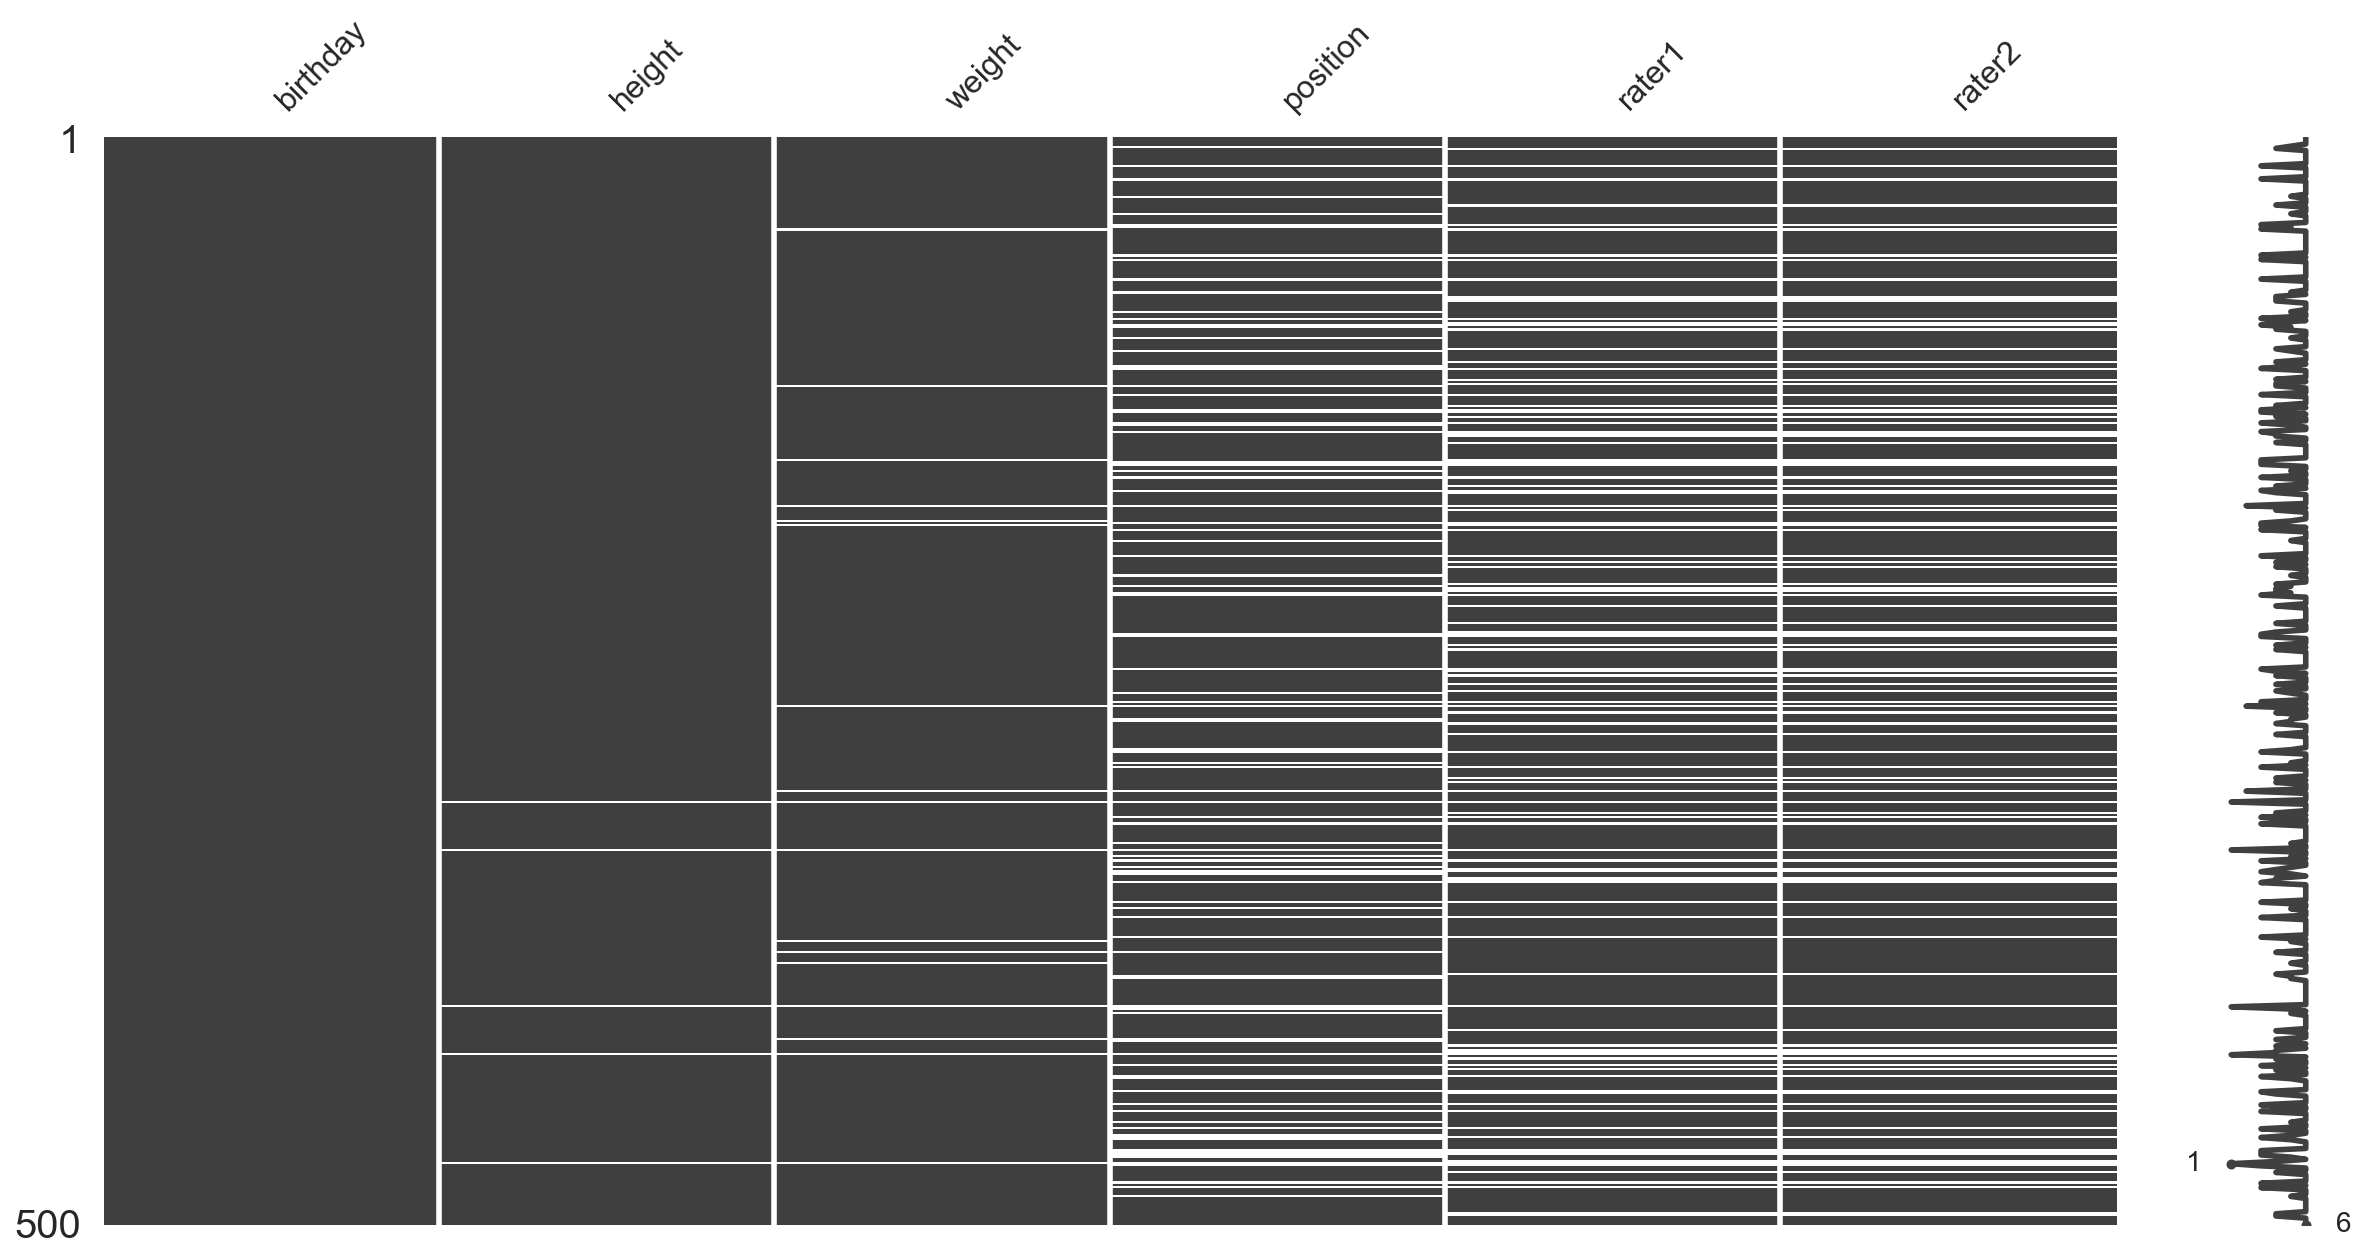

In [13]:
msno.matrix(players.sample(500),figsize=(20,10),width_ratios=(15,1))

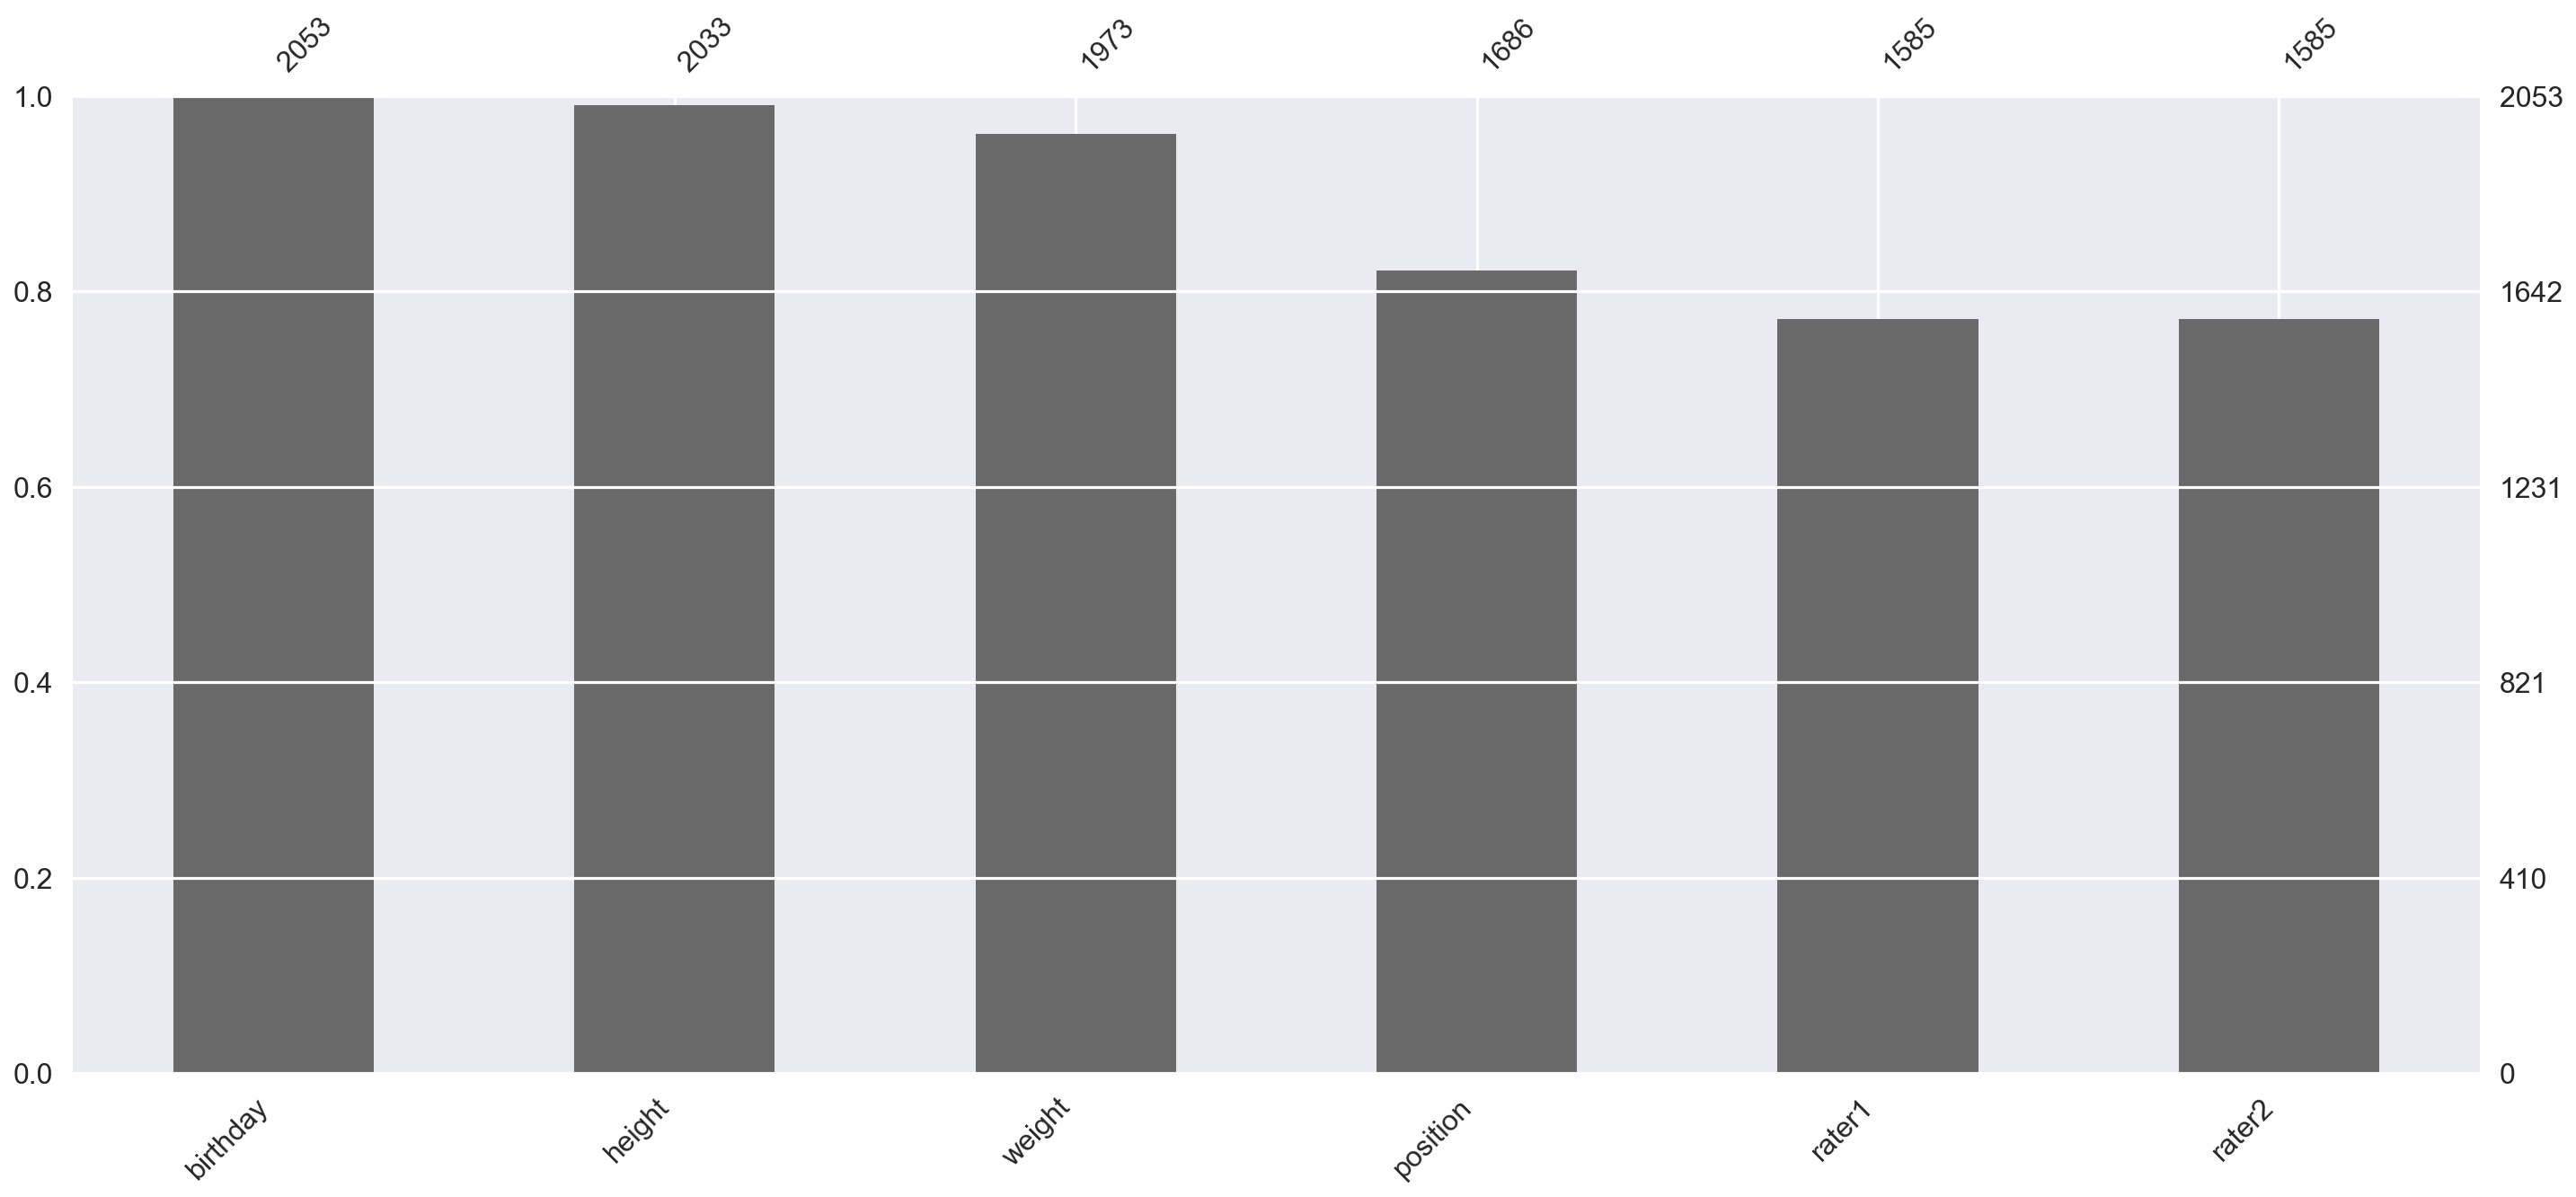

In [14]:
msno.bar(players)

In [15]:
print(len(players))
print(len((players[(players.rater1.isnull())& (players.rater2.isnull())])))

2053
468


In [16]:
playerNotNullRaters=players[players.rater1.notnull()]

In [17]:
playerNotNullRaters.shape

(1585, 6)

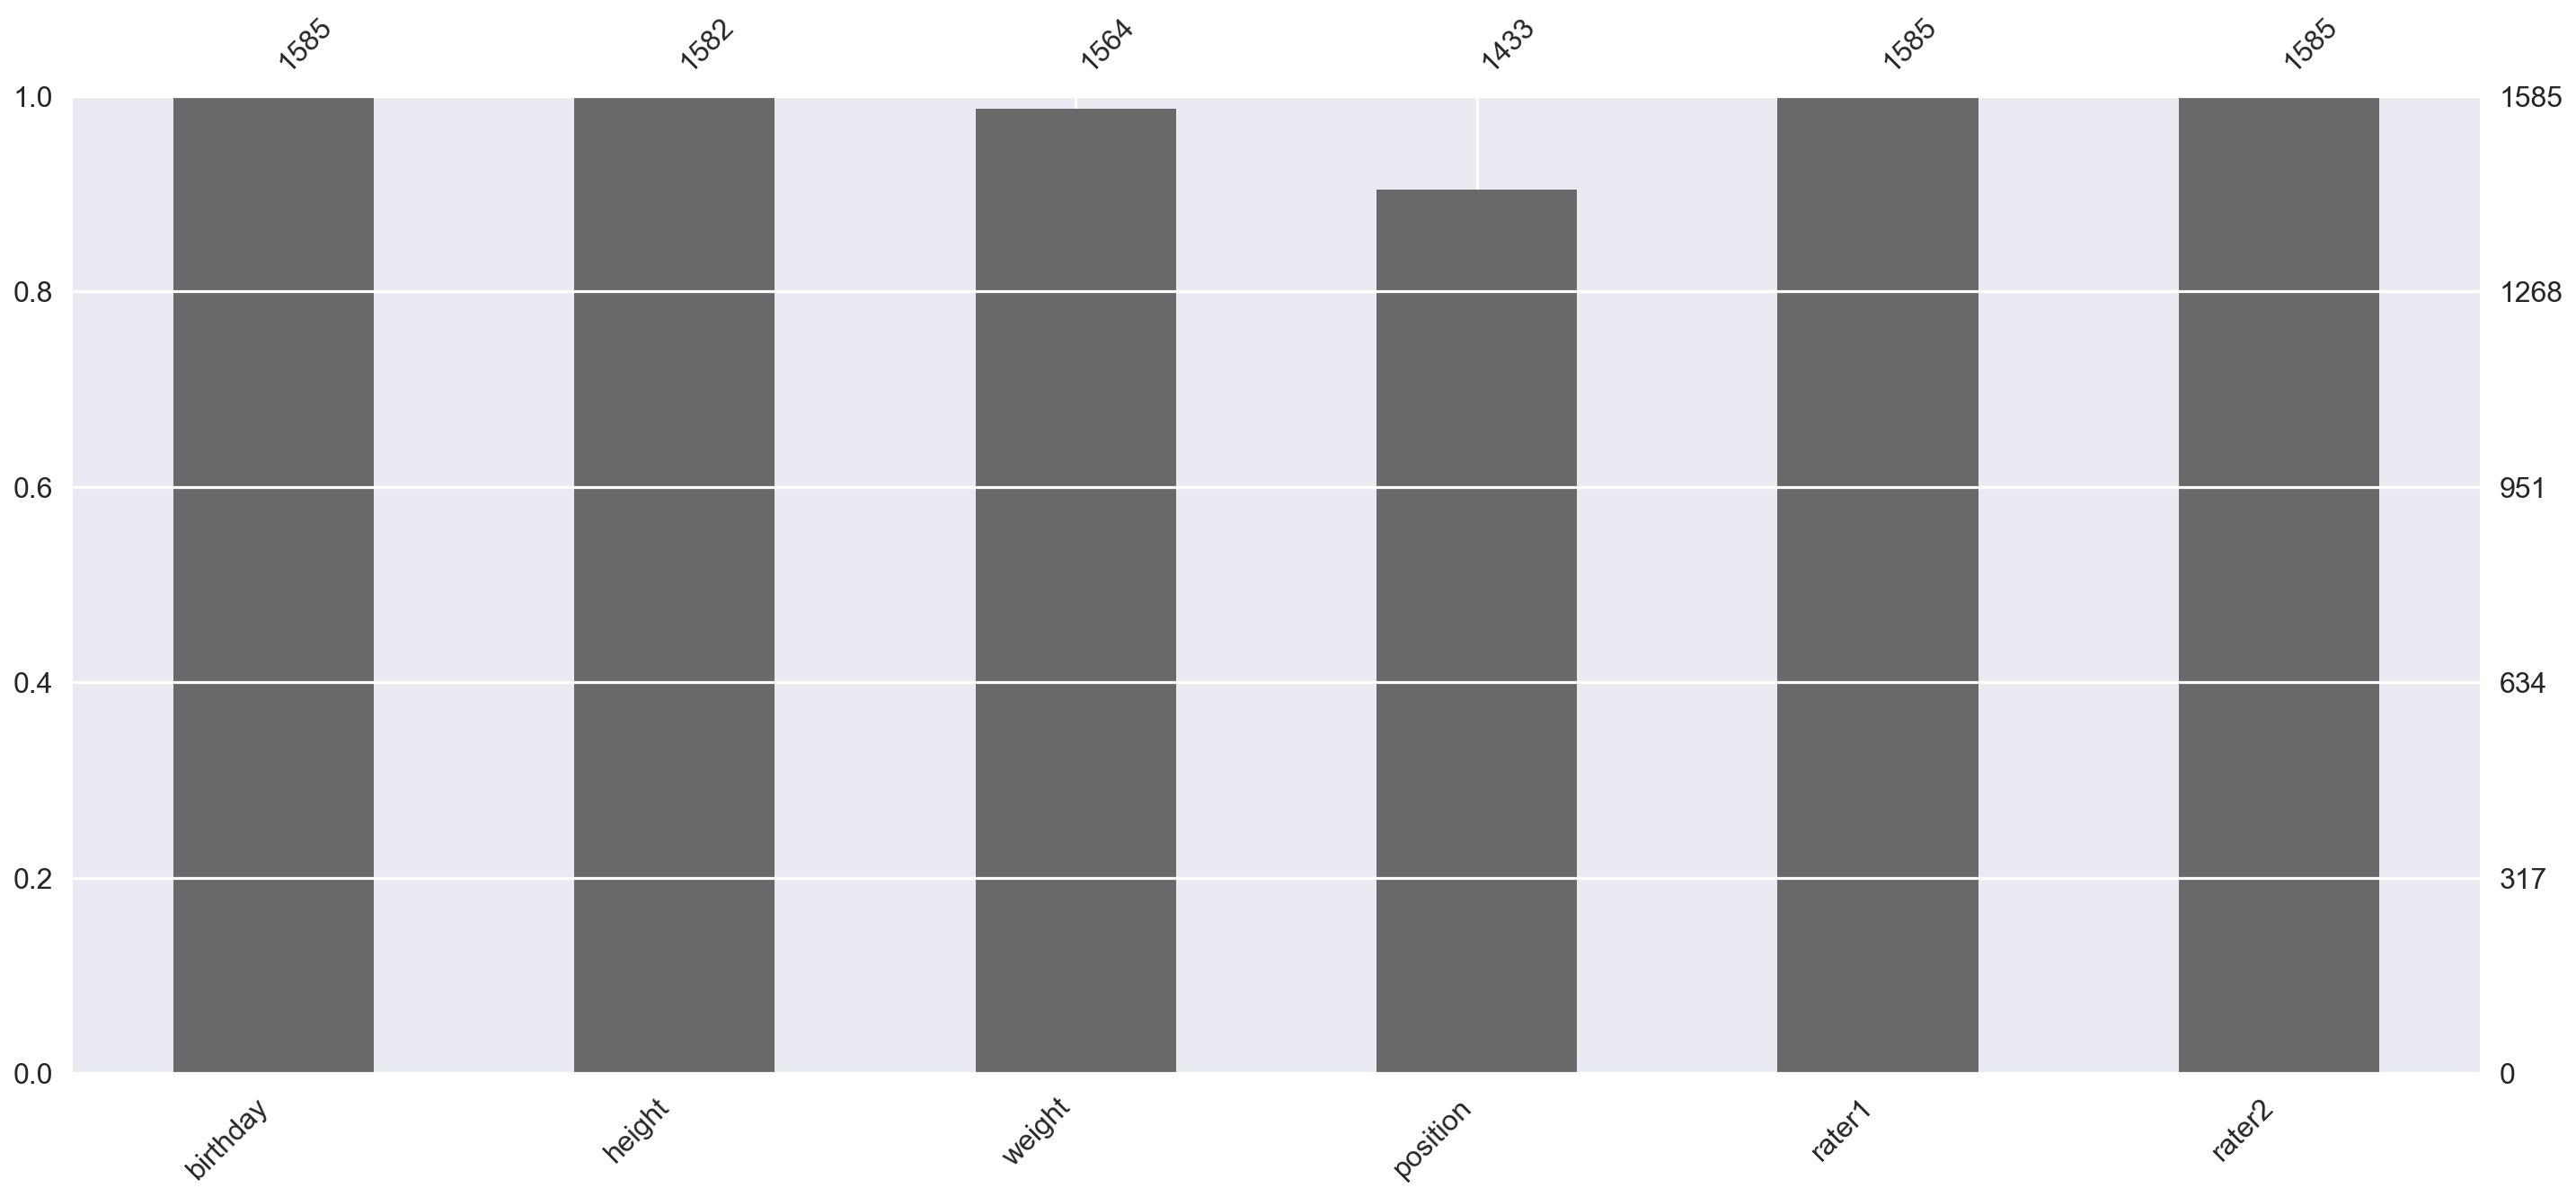

In [18]:
msno.bar(playerNotNullRaters)

In [19]:
pdcrosstab=pd.crosstab(playerNotNullRaters.rater1,playerNotNullRaters.rater2)
pdcrosstab
#plt.show()

rater2  0.00  0.25  0.50  0.75  1.00
rater1                              
0.00     424   200     2     0     0
0.25      27   470    54     0     0
0.50       0    23   116    31     0
0.75       0     0     2   104    34
1.00       0     0     0     6    92

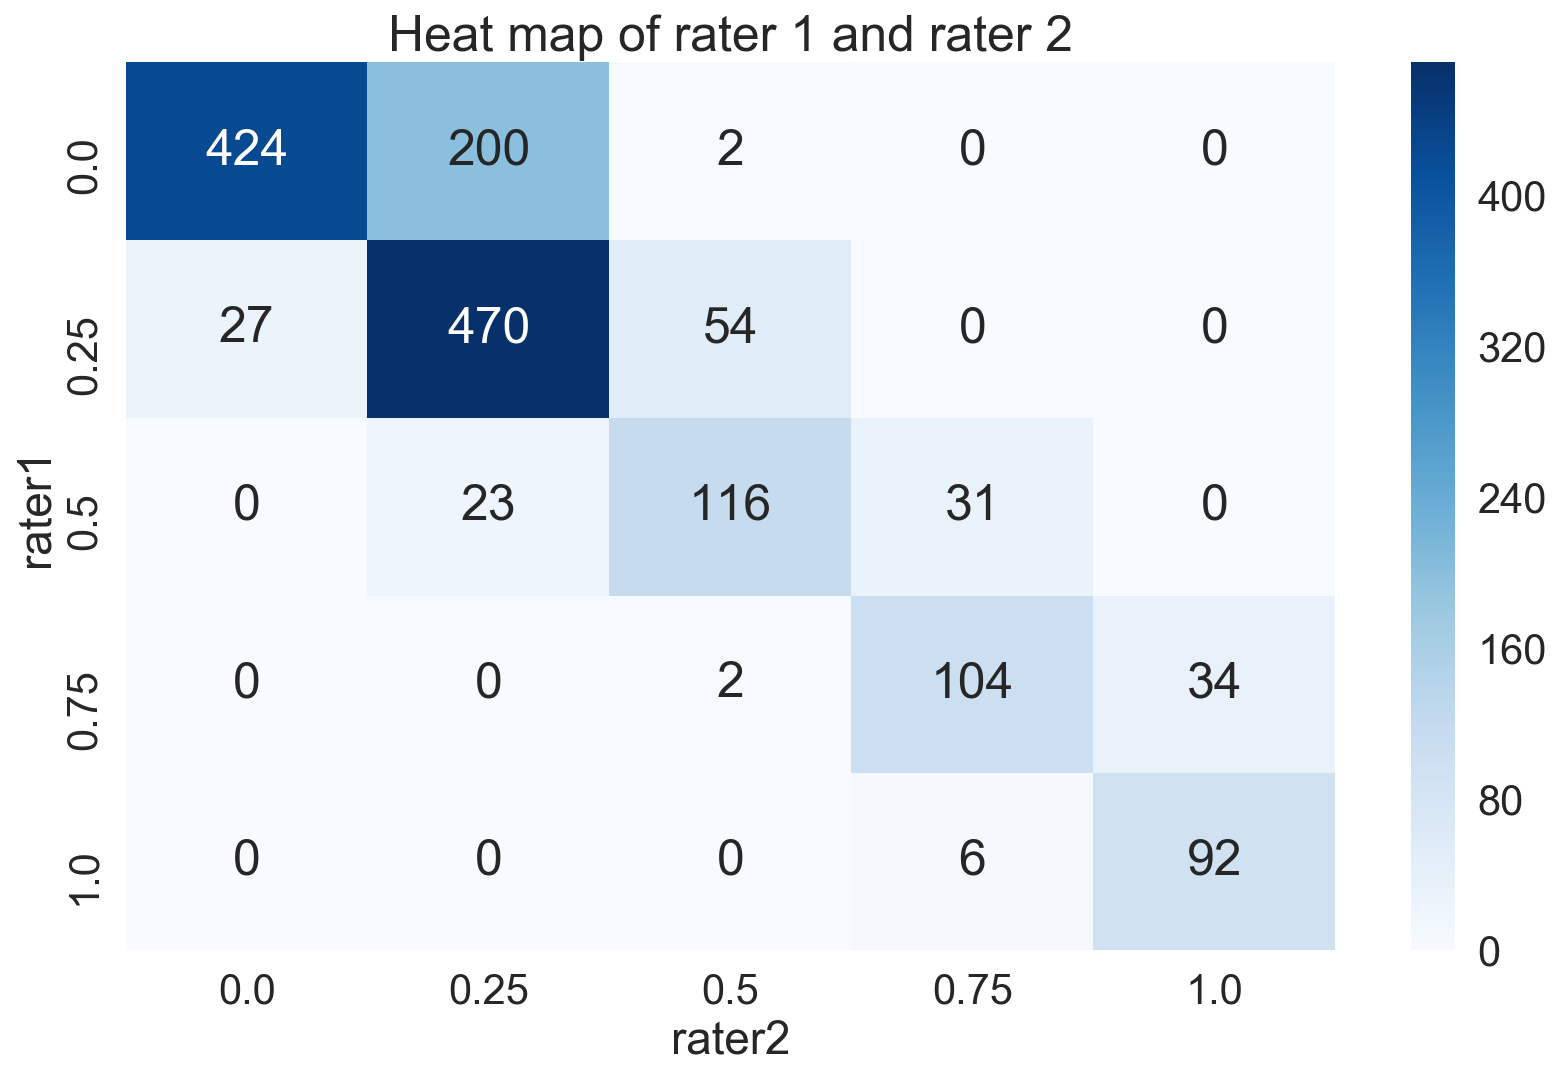

In [20]:
### subplots method of the py plots creates a figure along with subplots that are stored in an array
# we are getting only one subplot in this figure
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pdcrosstab, cmap='Blues', annot=True, fmt='d', ax=ax)
ax.set_title ("Heat map of rater 1 and rater 2")
fig.tight_layout()

In [21]:
playerNotNullRaters['SkinTone']=playerNotNullRaters[['rater1','rater2']].mean(axis=1)

In [22]:
playerNotNullRaters.head(10)

birthday  height  weight              position  \
playerShort                                                                
aaron-hughes            08.11.1979   182.0    71.0           Center Back   
aaron-hunt              04.09.1986   183.0    73.0  Attacking Midfielder   
aaron-lennon            16.04.1987   165.0    63.0      Right Midfielder   
aaron-ramsey            26.12.1990   178.0    76.0     Center Midfielder   
abdelhamid-el-kaoutari  17.03.1990   180.0    73.0           Center Back   
abdou-traore_2          17.01.1988   180.0    74.0      Right Midfielder   
abdoulaye-diallo_2      30.03.1992   189.0    80.0            Goalkeeper   
abdoulaye-keita_2       19.08.1990   188.0    83.0            Goalkeeper   
abdoulwhaid-sissoko     20.03.1990   180.0    68.0  Defensive Midfielder   
abdul-rahman-baba       02.07.1994   179.0    70.0         Left Fullback   

                        rater1  rater2  SkinTone  
playerShort                                       
aaron-hughes              0.25    0.00     0.125  
aaron-hunt                0.00    0.25     0.125  
aaron-lennon              0.25    0.25     0.250  
aaron-ramsey              0.00    0.00     0.000  
abdelhamid-el-kaoutari    0.25    0.25     0.250  
abdou-traore_2            0.75    0.75     0.750  
abdoulaye-diallo_2        0.75    1.00     0.875  
abdoulaye-keita_2         0.75    1.00     0.875  
abdoulwhaid-sissoko       1.00    1.00     1.000  
abdul-rahman-baba         0.75    1.00     0.875

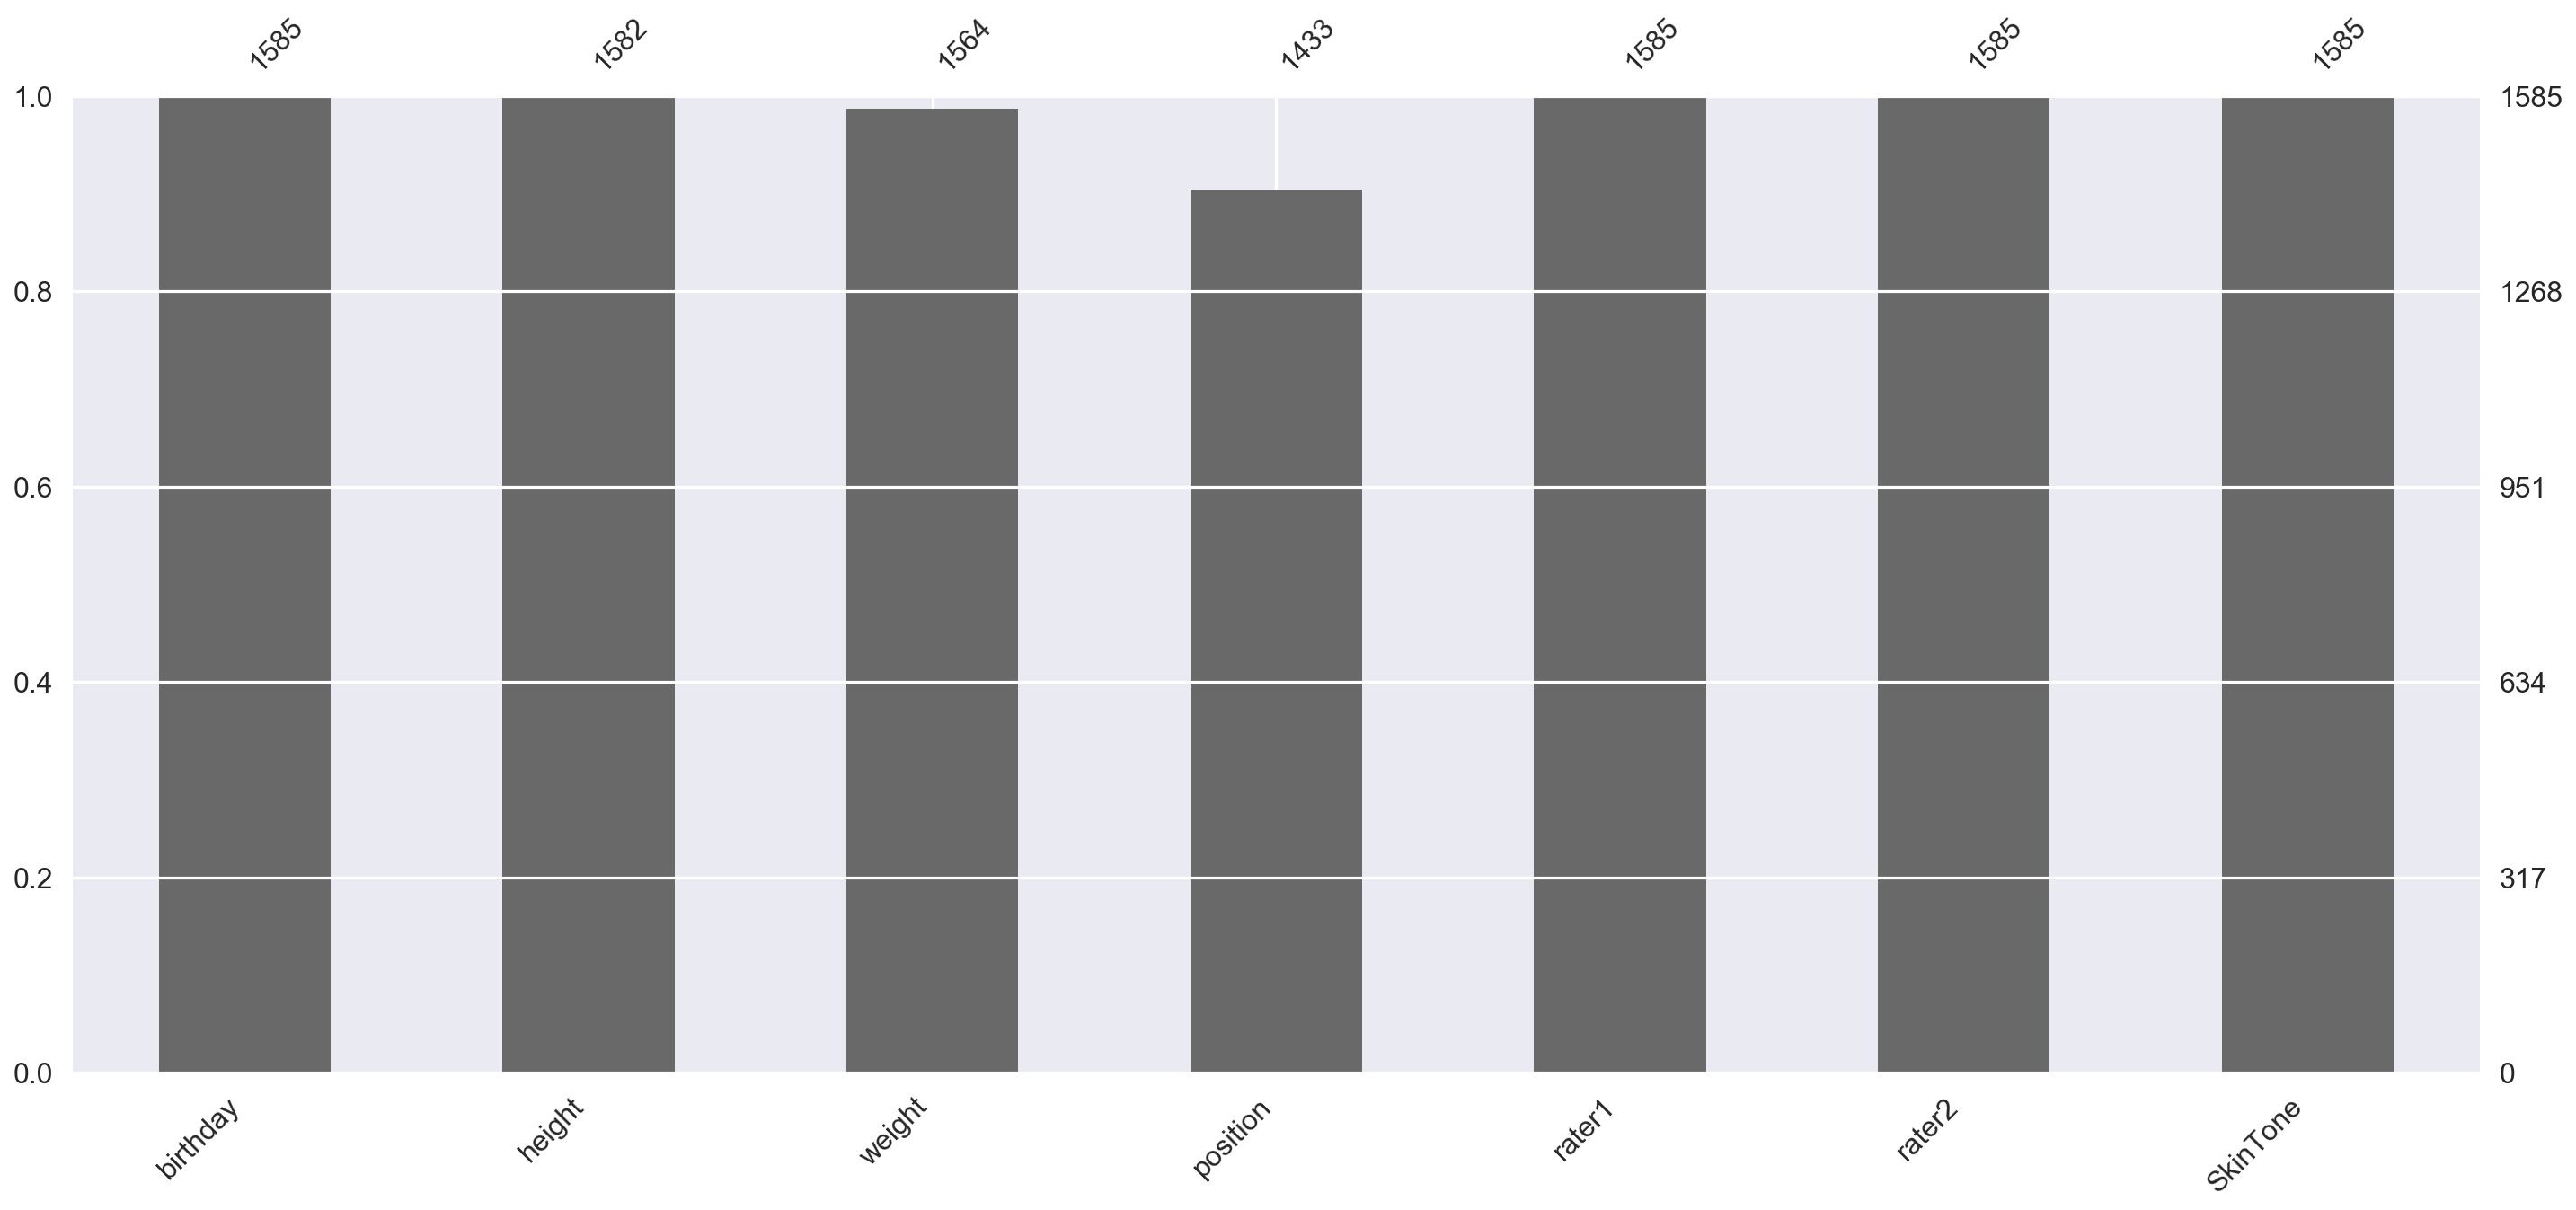

In [23]:
msno.bar(playerNotNullRaters)

### Visualize

 #### check how is the skinTone distribution to see if there is a normal distribution

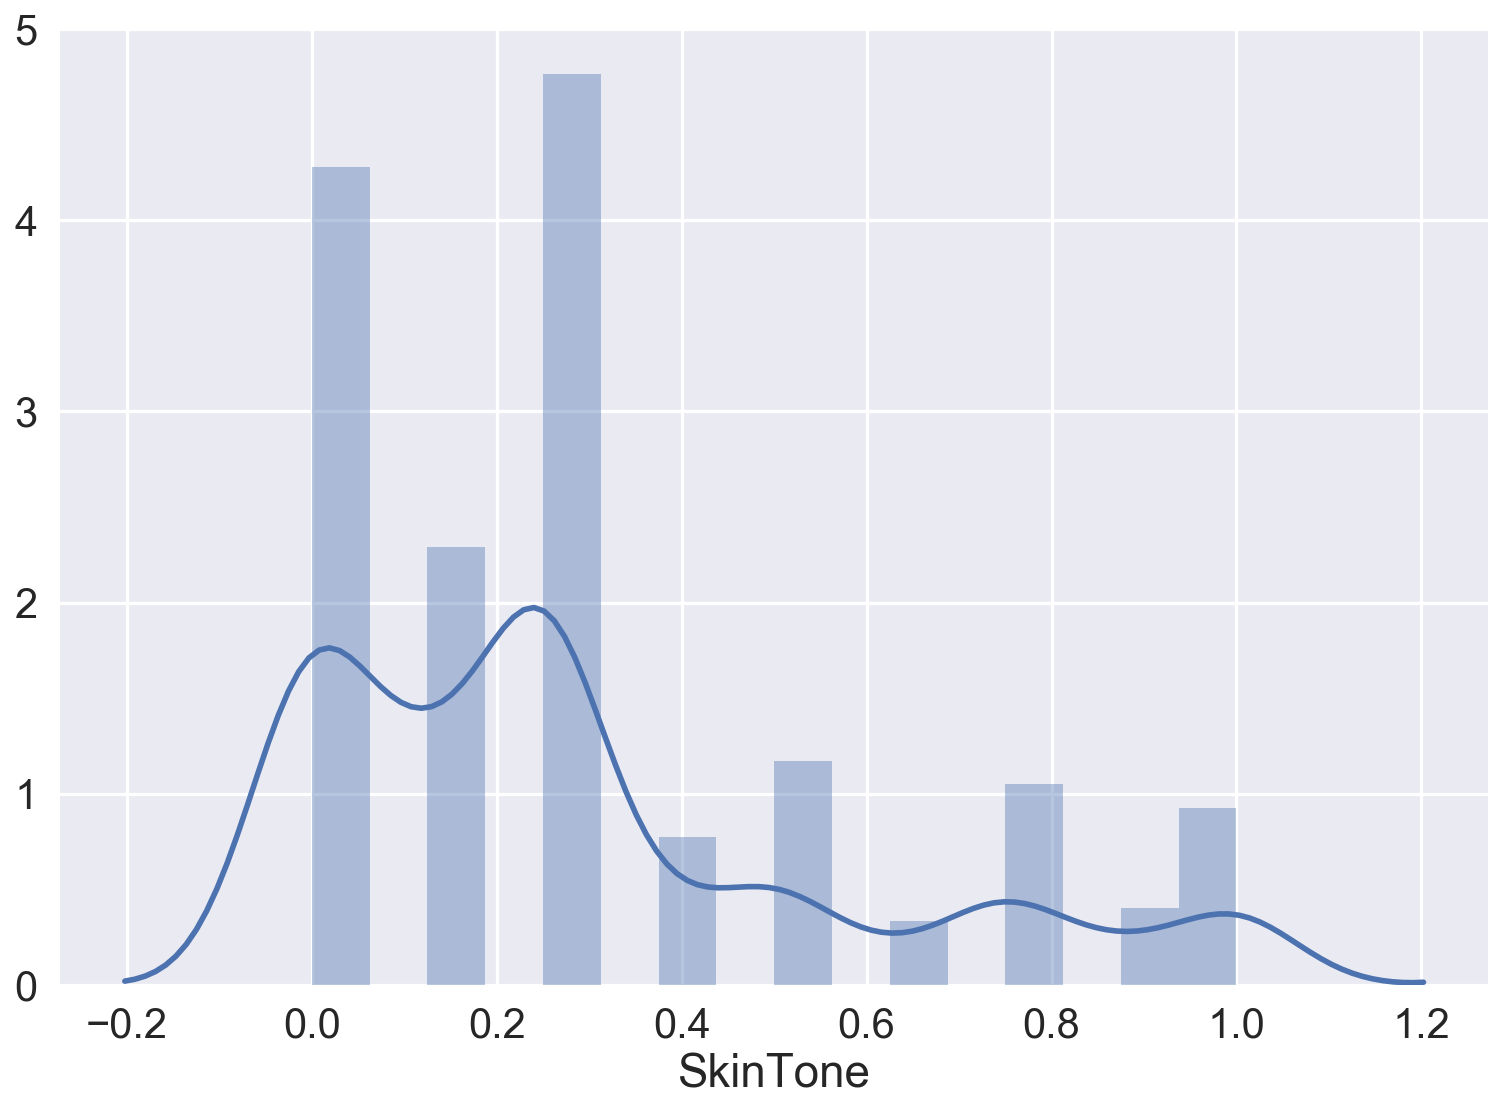

In [24]:
sns.distplot(playerNotNullRaters.SkinTone);

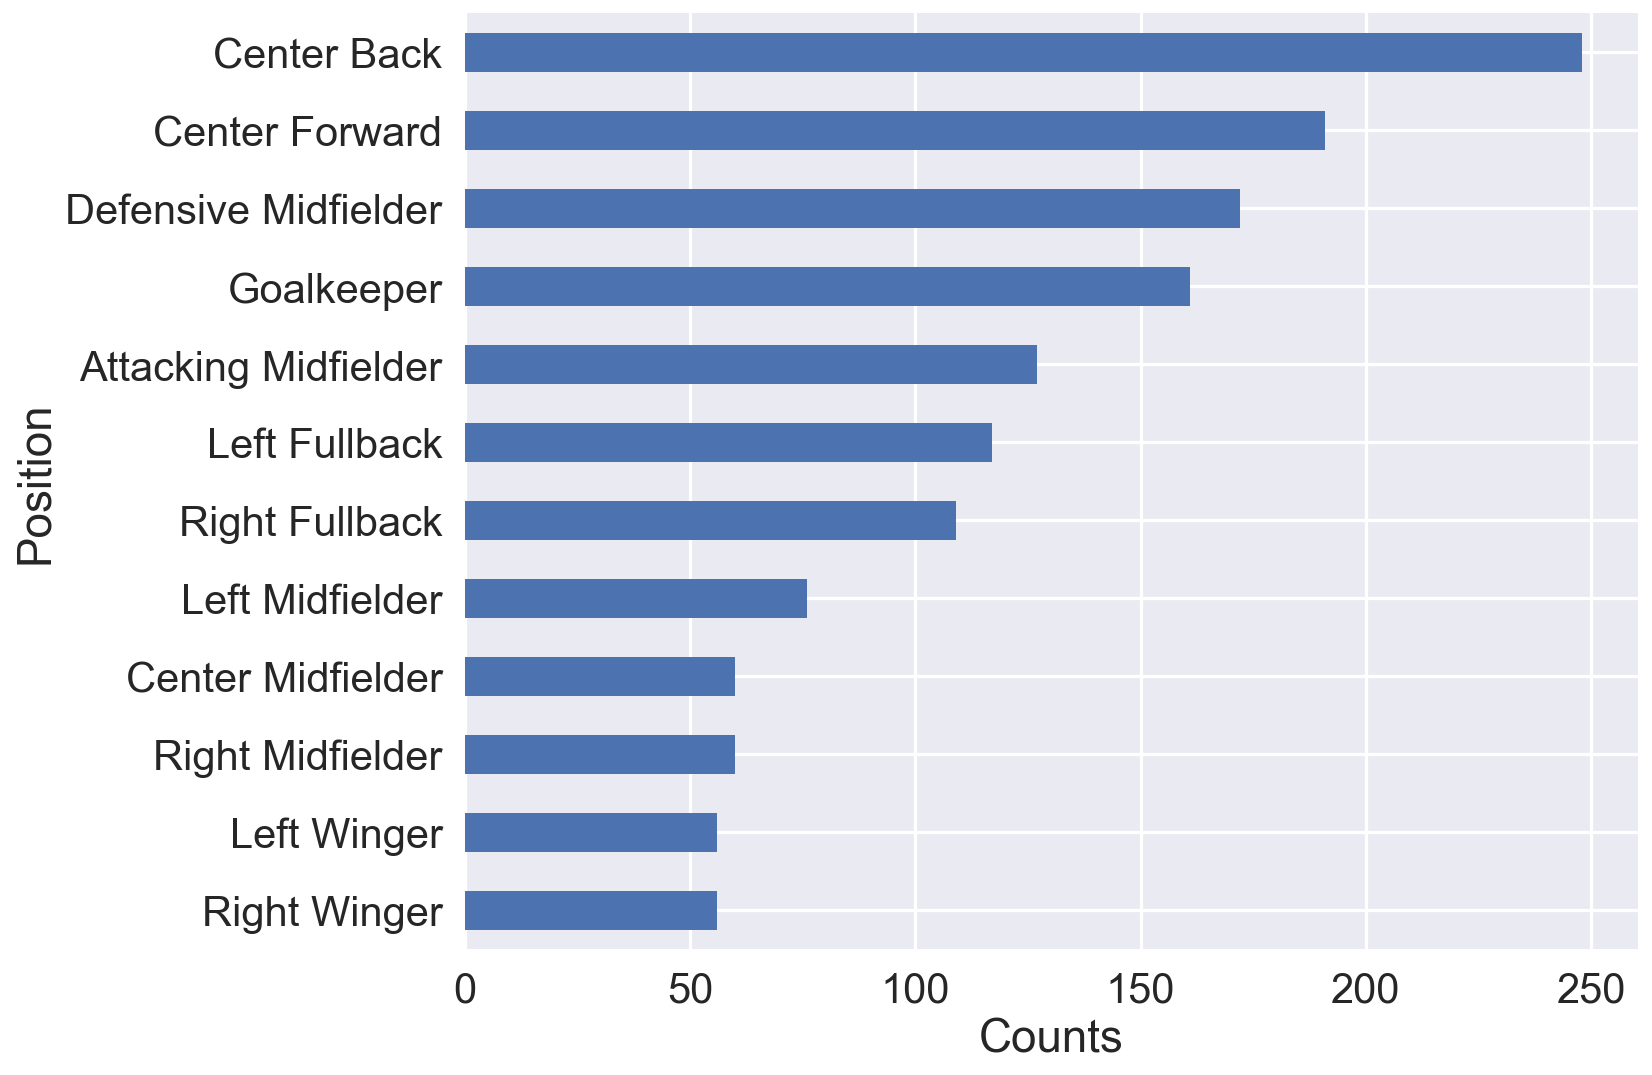

In [25]:
MIDSIZE=(12,8)
fig,ax=plt.subplots(figsize=MIDSIZE)
playerNotNullRaters.position.value_counts(ascending=True).plot(kind='barh',ax=ax)
ax.set_ylabel("Position")
ax.set_xlabel("Counts")

fig.tight_layout()

#### Grouping the positions into different groups based on the action performed

In [26]:
playerNotNullRaters

birthday  height  weight              position  \
playerShort                                                                
aaron-hughes            08.11.1979   182.0    71.0           Center Back   
aaron-hunt              04.09.1986   183.0    73.0  Attacking Midfielder   
aaron-lennon            16.04.1987   165.0    63.0      Right Midfielder   
aaron-ramsey            26.12.1990   178.0    76.0     Center Midfielder   
abdelhamid-el-kaoutari  17.03.1990   180.0    73.0           Center Back   
abdou-traore_2          17.01.1988   180.0    74.0      Right Midfielder   
abdoulaye-diallo_2      30.03.1992   189.0    80.0            Goalkeeper   
abdoulaye-keita_2       19.08.1990   188.0    83.0            Goalkeeper   
abdoulwhaid-sissoko     20.03.1990   180.0    68.0  Defensive Midfielder   
abdul-rahman-baba       02.07.1994   179.0    70.0         Left Fullback   
abdul-razak             11.11.1992   180.0    78.0     Center Midfielder   
abel-aguilar            06.01.1985   185.0    78.0  Defensive Midfielder   
abelaziz-barrada        19.06.1989   185.0    78.0                   NaN   
abou-diaby              11.05.1986   188.0    75.0     Center Midfielder   
adam-bodzek             07.09.1985   184.0    79.0  Defensive Midfielder   
adam-campbell           01.01.1995   168.0     NaN                   NaN   
adam-federici           31.01.1985   188.0    90.0            Goalkeeper   
adam-hlousek            20.12.1988   188.0    76.0       Left Midfielder   
adam-johnson            14.07.1987   175.0    62.0       Left Midfielder   
adam-morgan             21.04.1994   179.0     NaN                   NaN   
adam-pinter             12.06.1988   190.0    76.0           Center Back   
adam-smith_3            29.04.1991   173.0    73.0        Right Fullback   
adam-szalai             09.12.1987   193.0    87.0        Center Forward   
adan                    13.05.1987   190.0    88.0            Goalkeeper   
adel-taarabt            24.05.1989   180.0    78.0       Left Midfielder   
adil-rami               27.12.1985   190.0    88.0           Center Back   
adrian-colunga          17.11.1984   171.0    69.0        Center Forward   
adrian-mutu             08.01.1979   180.0    74.0           Left Winger   
adrian_2                08.01.1988   183.0    73.0        Center Forward   
adrian_7                21.05.1983   188.0    82.0            Goalkeeper   
...                            ...     ...     ...                   ...   
xisco_2                 26.06.1986   188.0    85.0        Center Forward   
yacine-brahimi          08.02.1990   175.0    65.0  Attacking Midfielder   
yann-mvila              26.06.1990   169.0    56.0  Defensive Midfielder   
yannick-djalo           05.05.1986   171.0    62.0        Center Forward   
yannik-schulze          05.02.1995   186.0    77.0           Center Back   
yassine-benzia          08.09.1994   179.0    71.0                   NaN   
yassine-el-ghanassi     12.07.1990   173.0     NaN           Left Winger   
yassine-jebbour         24.08.1991   181.0    70.0         Left Fullback   
yaya-toure              13.05.1983   191.0    90.0  Defensive Midfielder   
yoan-gouffran           25.05.1986   175.0    70.0          Right Winger   
yoann-gourcuff          11.07.1986   185.0    79.0  Attacking Midfielder   
yohan-cabaye            14.01.1986   175.0    69.0  Defensive Midfielder   
yohandry-orozco         19.03.1991   164.0    55.0  Attacking Midfielder   
yossi-benayoun          05.05.1980   178.0    70.0  Attacking Midfielder   
younes-belhanda         25.02.1990   174.0    75.0  Attacking Midfielder   
younes-kaboul           04.01.1986   190.0    87.0           Center Back   
youssef-el-arabi        03.02.1987   180.0    75.0        Center Forward   
yunus-malli             24.02.1992   179.0    70.0  Attacking Midfielder   
zdenk-pospch            14.12.1978   174.0    72.0        Right Fullback   
zdravko-kuzmanovic      22.09.1987   186.0    71.0  Defensive Midfielder  

In [27]:
#get the unique positions
position_types=playerNotNullRaters.position.unique()
position_types

array(['Center Back', 'Attacking Midfielder', 'Right Midfielder',
       'Center Midfielder', 'Goalkeeper', 'Defensive Midfielder',
       'Left Fullback', nan, 'Left Midfielder', 'Right Fullback',
       'Center Forward', 'Left Winger', 'Right Winger'], dtype=object)

In [28]:
defence=['Center Back','Goalkeeper','Defensive Midfielder','Left Fullback','Right Fullback']
attacker=[ 'Attacking Midfielder','Center Forward', 'Left Winger', 'Right Winger']
Midfield=['Center Midfielder', 'Right Midfielder','Left Midfielder']

In [29]:
playerNotNullRaters.loc[playerNotNullRaters['position'].isin(defence),"position_agg"]="Defense"
playerNotNullRaters.loc[playerNotNullRaters['position'].isin(attacker),"position_agg"]="Attacker"
playerNotNullRaters.loc[playerNotNullRaters['position'].isin(Midfield),"position_agg"]="Midfield"

In [30]:
playerNotNullRaters

birthday  height  weight              position  \
playerShort                                                                
aaron-hughes            08.11.1979   182.0    71.0           Center Back   
aaron-hunt              04.09.1986   183.0    73.0  Attacking Midfielder   
aaron-lennon            16.04.1987   165.0    63.0      Right Midfielder   
aaron-ramsey            26.12.1990   178.0    76.0     Center Midfielder   
abdelhamid-el-kaoutari  17.03.1990   180.0    73.0           Center Back   
abdou-traore_2          17.01.1988   180.0    74.0      Right Midfielder   
abdoulaye-diallo_2      30.03.1992   189.0    80.0            Goalkeeper   
abdoulaye-keita_2       19.08.1990   188.0    83.0            Goalkeeper   
abdoulwhaid-sissoko     20.03.1990   180.0    68.0  Defensive Midfielder   
abdul-rahman-baba       02.07.1994   179.0    70.0         Left Fullback   
abdul-razak             11.11.1992   180.0    78.0     Center Midfielder   
abel-aguilar            06.01.1985   185.0    78.0  Defensive Midfielder   
abelaziz-barrada        19.06.1989   185.0    78.0                   NaN   
abou-diaby              11.05.1986   188.0    75.0     Center Midfielder   
adam-bodzek             07.09.1985   184.0    79.0  Defensive Midfielder   
adam-campbell           01.01.1995   168.0     NaN                   NaN   
adam-federici           31.01.1985   188.0    90.0            Goalkeeper   
adam-hlousek            20.12.1988   188.0    76.0       Left Midfielder   
adam-johnson            14.07.1987   175.0    62.0       Left Midfielder   
adam-morgan             21.04.1994   179.0     NaN                   NaN   
adam-pinter             12.06.1988   190.0    76.0           Center Back   
adam-smith_3            29.04.1991   173.0    73.0        Right Fullback   
adam-szalai             09.12.1987   193.0    87.0        Center Forward   
adan                    13.05.1987   190.0    88.0            Goalkeeper   
adel-taarabt            24.05.1989   180.0    78.0       Left Midfielder   
adil-rami               27.12.1985   190.0    88.0           Center Back   
adrian-colunga          17.11.1984   171.0    69.0        Center Forward   
adrian-mutu             08.01.1979   180.0    74.0           Left Winger   
adrian_2                08.01.1988   183.0    73.0        Center Forward   
adrian_7                21.05.1983   188.0    82.0            Goalkeeper   
...                            ...     ...     ...                   ...   
xisco_2                 26.06.1986   188.0    85.0        Center Forward   
yacine-brahimi          08.02.1990   175.0    65.0  Attacking Midfielder   
yann-mvila              26.06.1990   169.0    56.0  Defensive Midfielder   
yannick-djalo           05.05.1986   171.0    62.0        Center Forward   
yannik-schulze          05.02.1995   186.0    77.0           Center Back   
yassine-benzia          08.09.1994   179.0    71.0                   NaN   
yassine-el-ghanassi     12.07.1990   173.0     NaN           Left Winger   
yassine-jebbour         24.08.1991   181.0    70.0         Left Fullback   
yaya-toure              13.05.1983   191.0    90.0  Defensive Midfielder   
yoan-gouffran           25.05.1986   175.0    70.0          Right Winger   
yoann-gourcuff          11.07.1986   185.0    79.0  Attacking Midfielder   
yohan-cabaye            14.01.1986   175.0    69.0  Defensive Midfielder   
yohandry-orozco         19.03.1991   164.0    55.0  Attacking Midfielder   
yossi-benayoun          05.05.1980   178.0    70.0  Attacking Midfielder   
younes-belhanda         25.02.1990   174.0    75.0  Attacking Midfielder   
younes-kaboul           04.01.1986   190.0    87.0           Center Back   
youssef-el-arabi        03.02.1987   180.0    75.0        Center Forward   
yunus-malli             24.02.1992   179.0    70.0  Attacking Midfielder   
zdenk-pospch            14.12.1978   174.0    72.0        Right Fullback   
zdravko-kuzmanovic      22.09.1987   186.0    71.0  Defensive Midfielder  

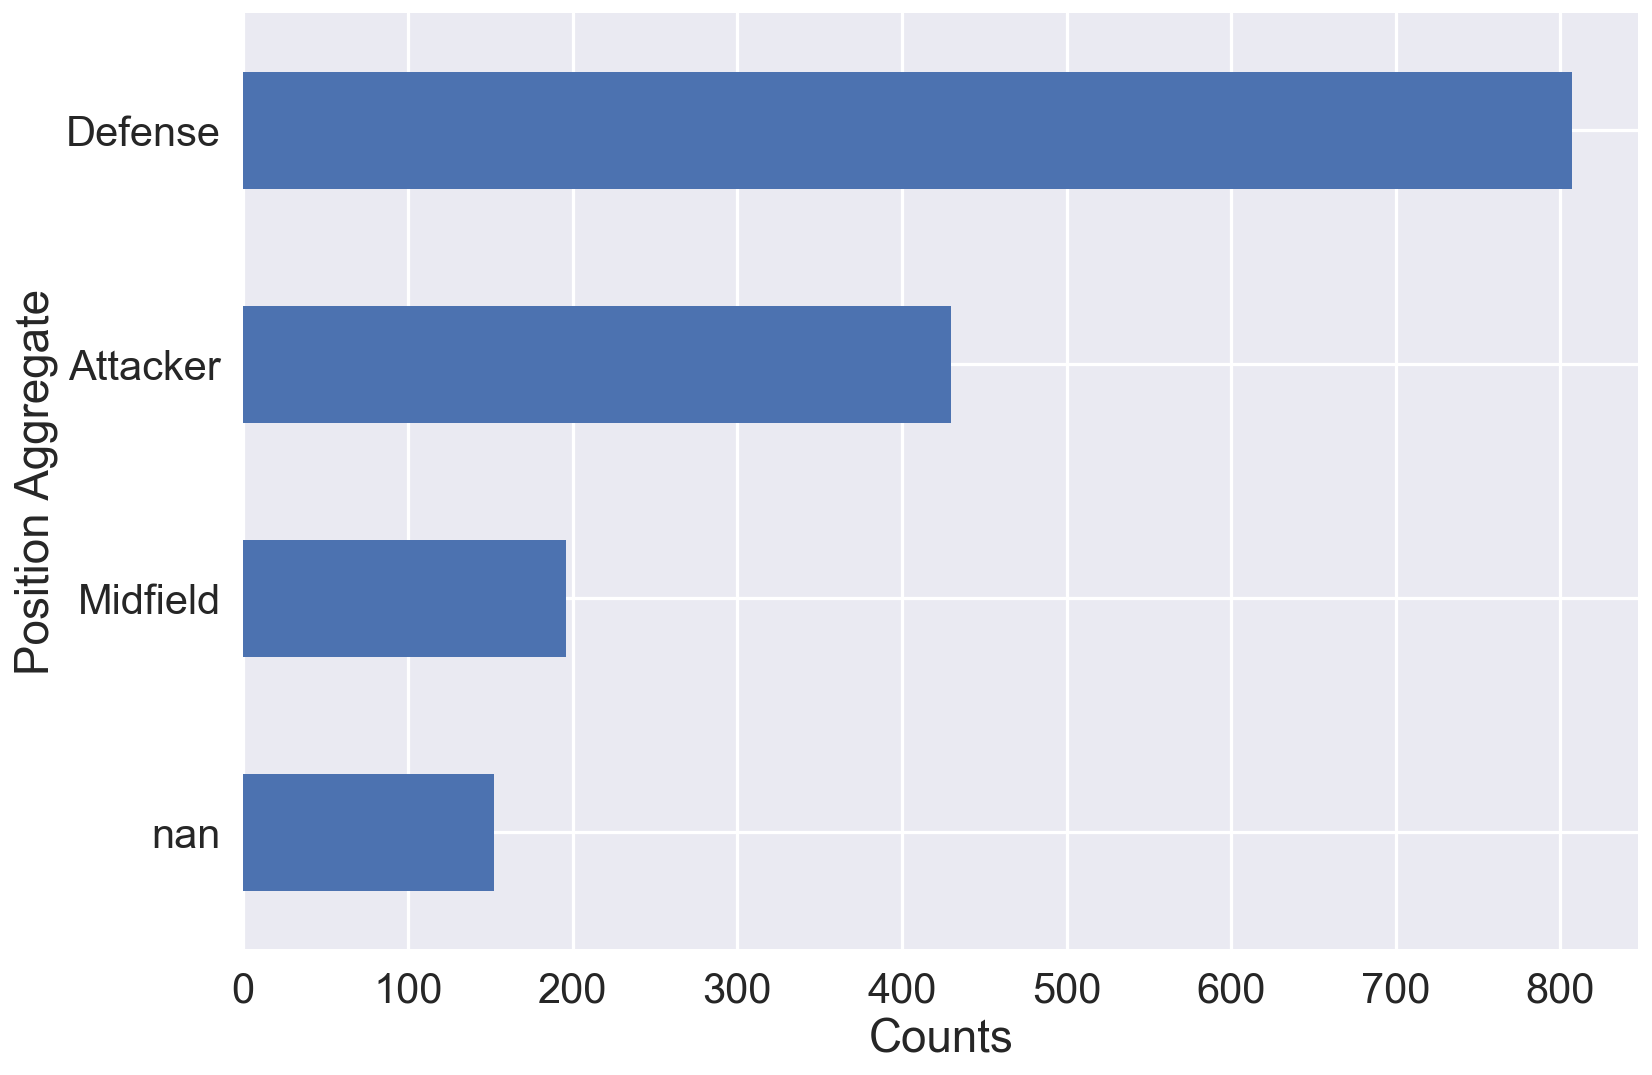

In [31]:
MIDSIZE=(12,8)
fig,ax=plt.subplots(figsize=MIDSIZE)
#playerNotNullRaters['position_agg'].value_counts()
playerNotNullRaters['position_agg'].value_counts(dropna=False,ascending=True).plot(kind='barh',ax=ax)
ax.set_ylabel("Position Aggregate")
ax.set_xlabel("Counts")
fig.tight_layout()

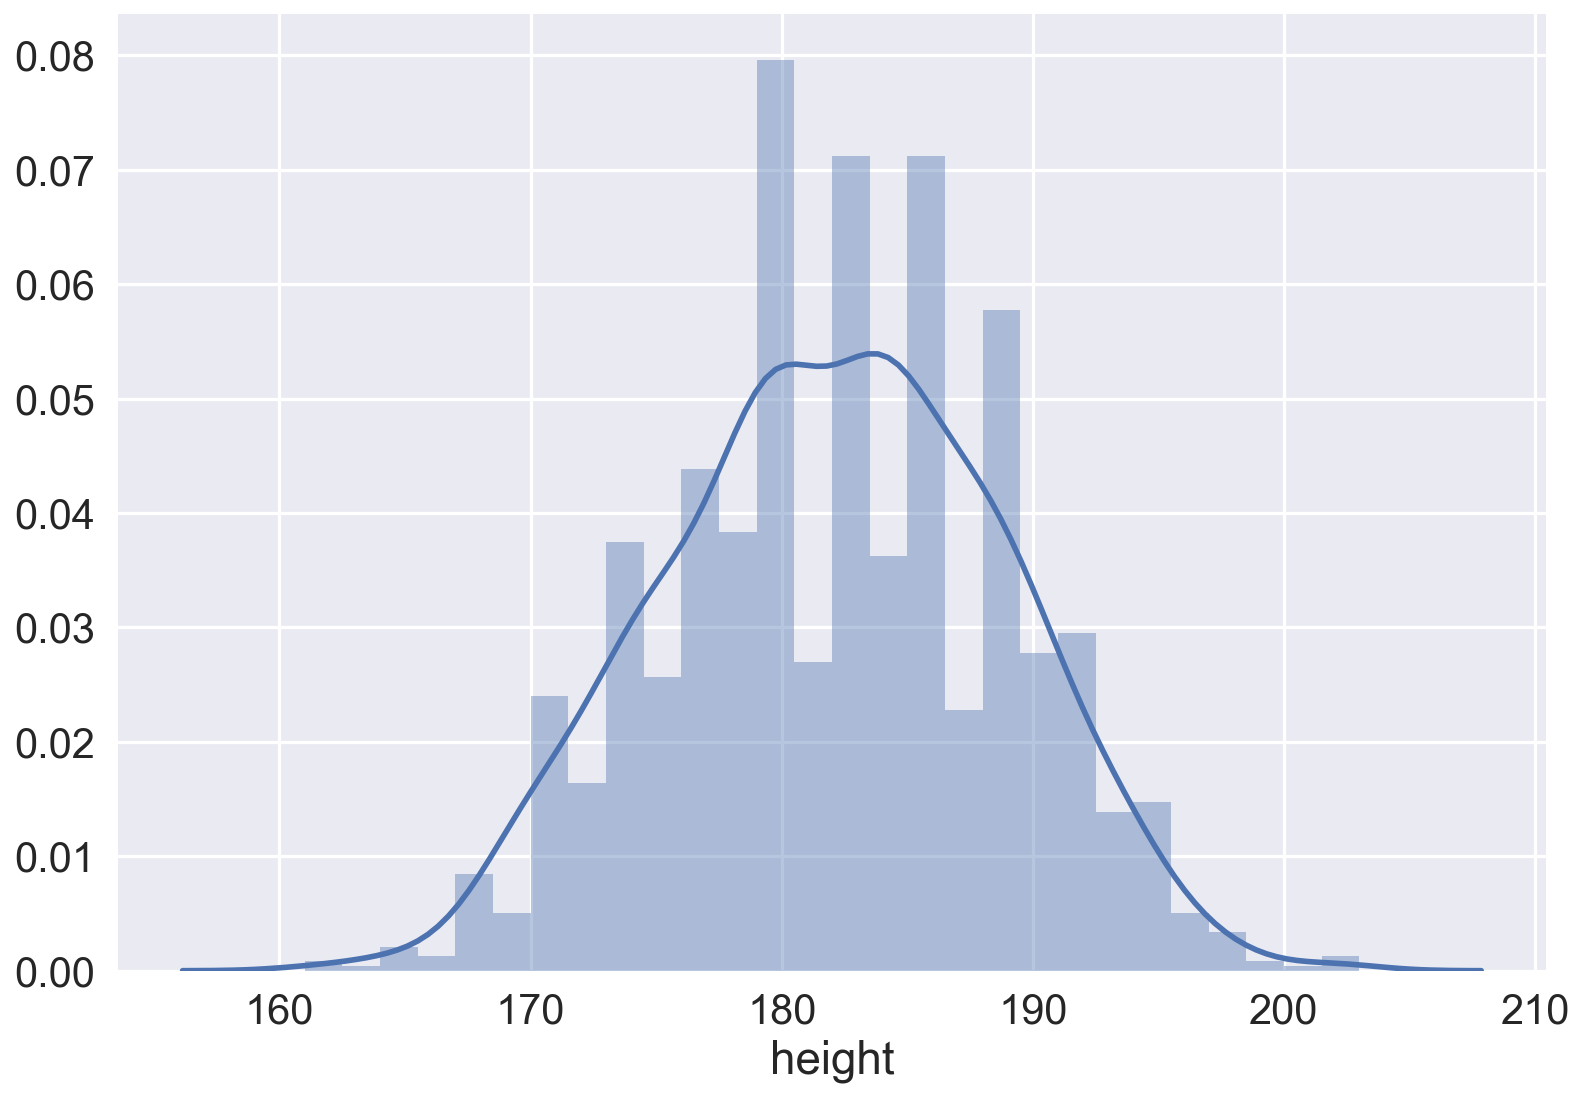

In [32]:
sns.distplot(playerNotNullRaters.height.dropna())

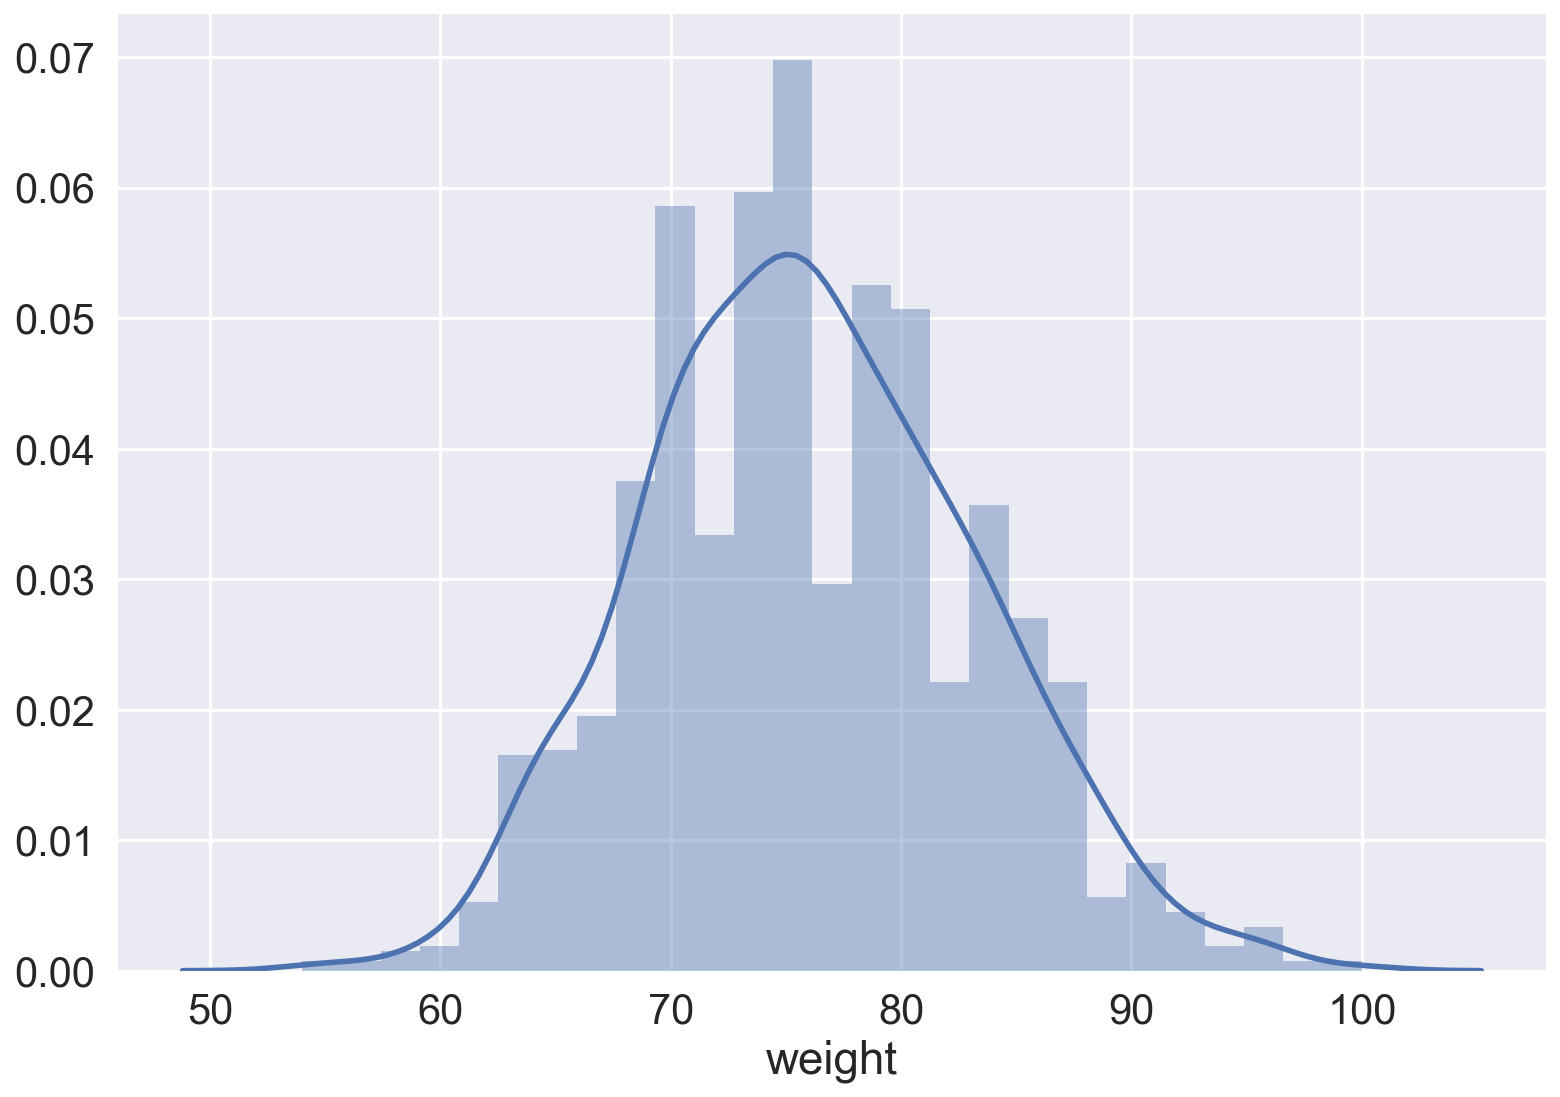

In [33]:
sns.distplot(playerNotNullRaters.weight.dropna())

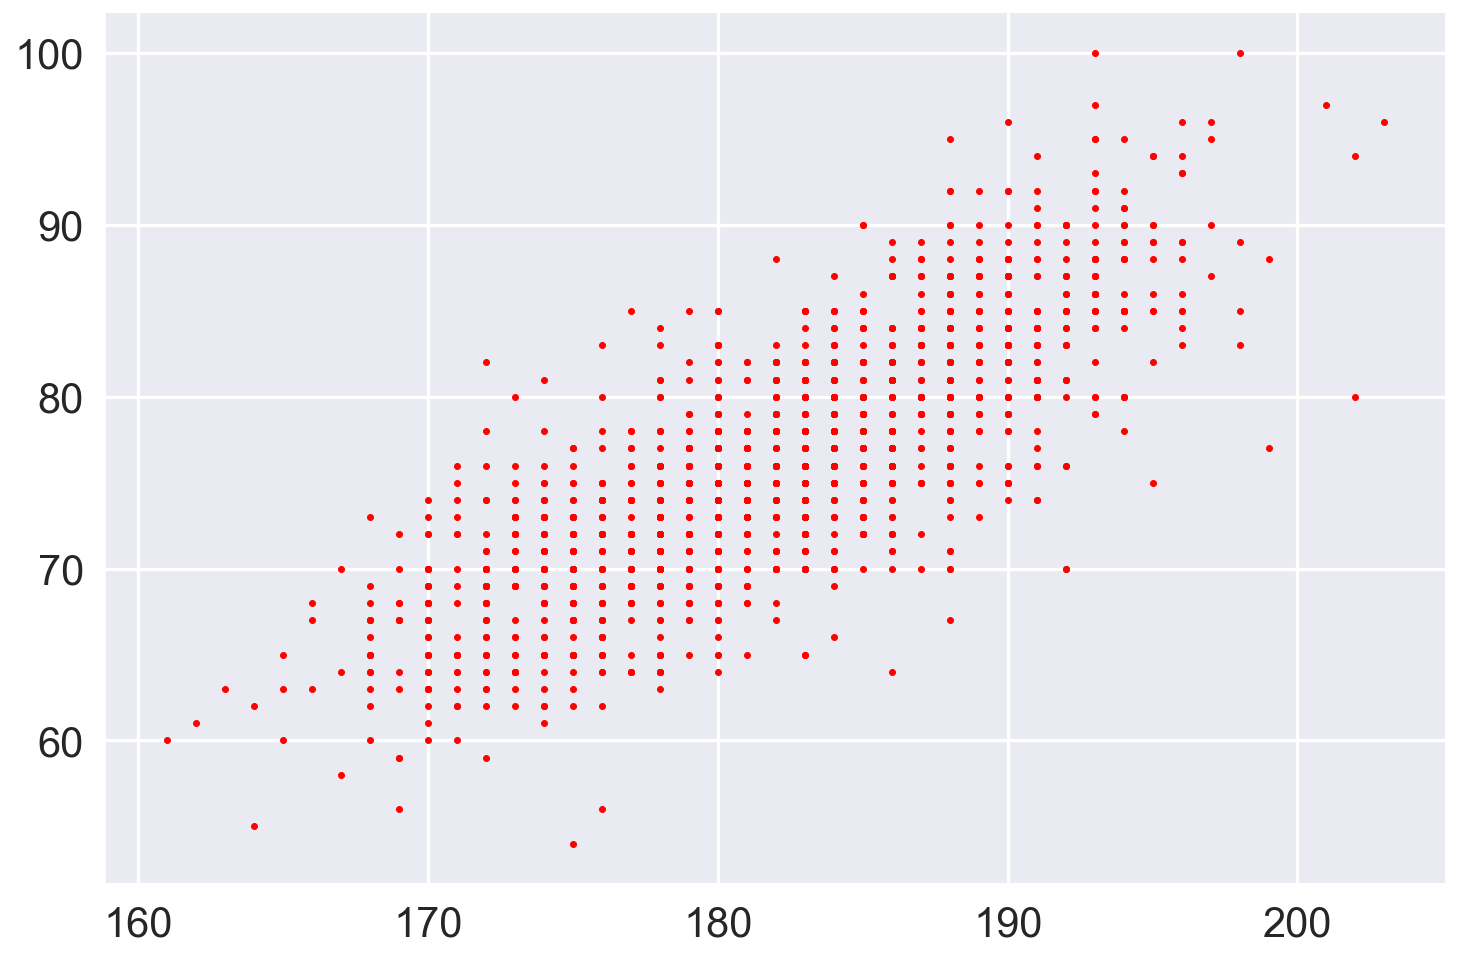

In [34]:
MIDSIZE=(12,8)
fig,ax=plt.subplots(figsize=MIDSIZE)
N=100
#random.rand(N) creates Random values in a given shape.
#Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
#area = (20*np.random.rand(N))**1
#area = (20*np.random.rand(N))**1  # 0 to 10 point radii
#area = np.random.rand(*playerNotNullRaters.shape)
#area
plt.scatter(playerNotNullRaters['height'],playerNotNullRaters['weight'],color='r',marker='o',s=9)

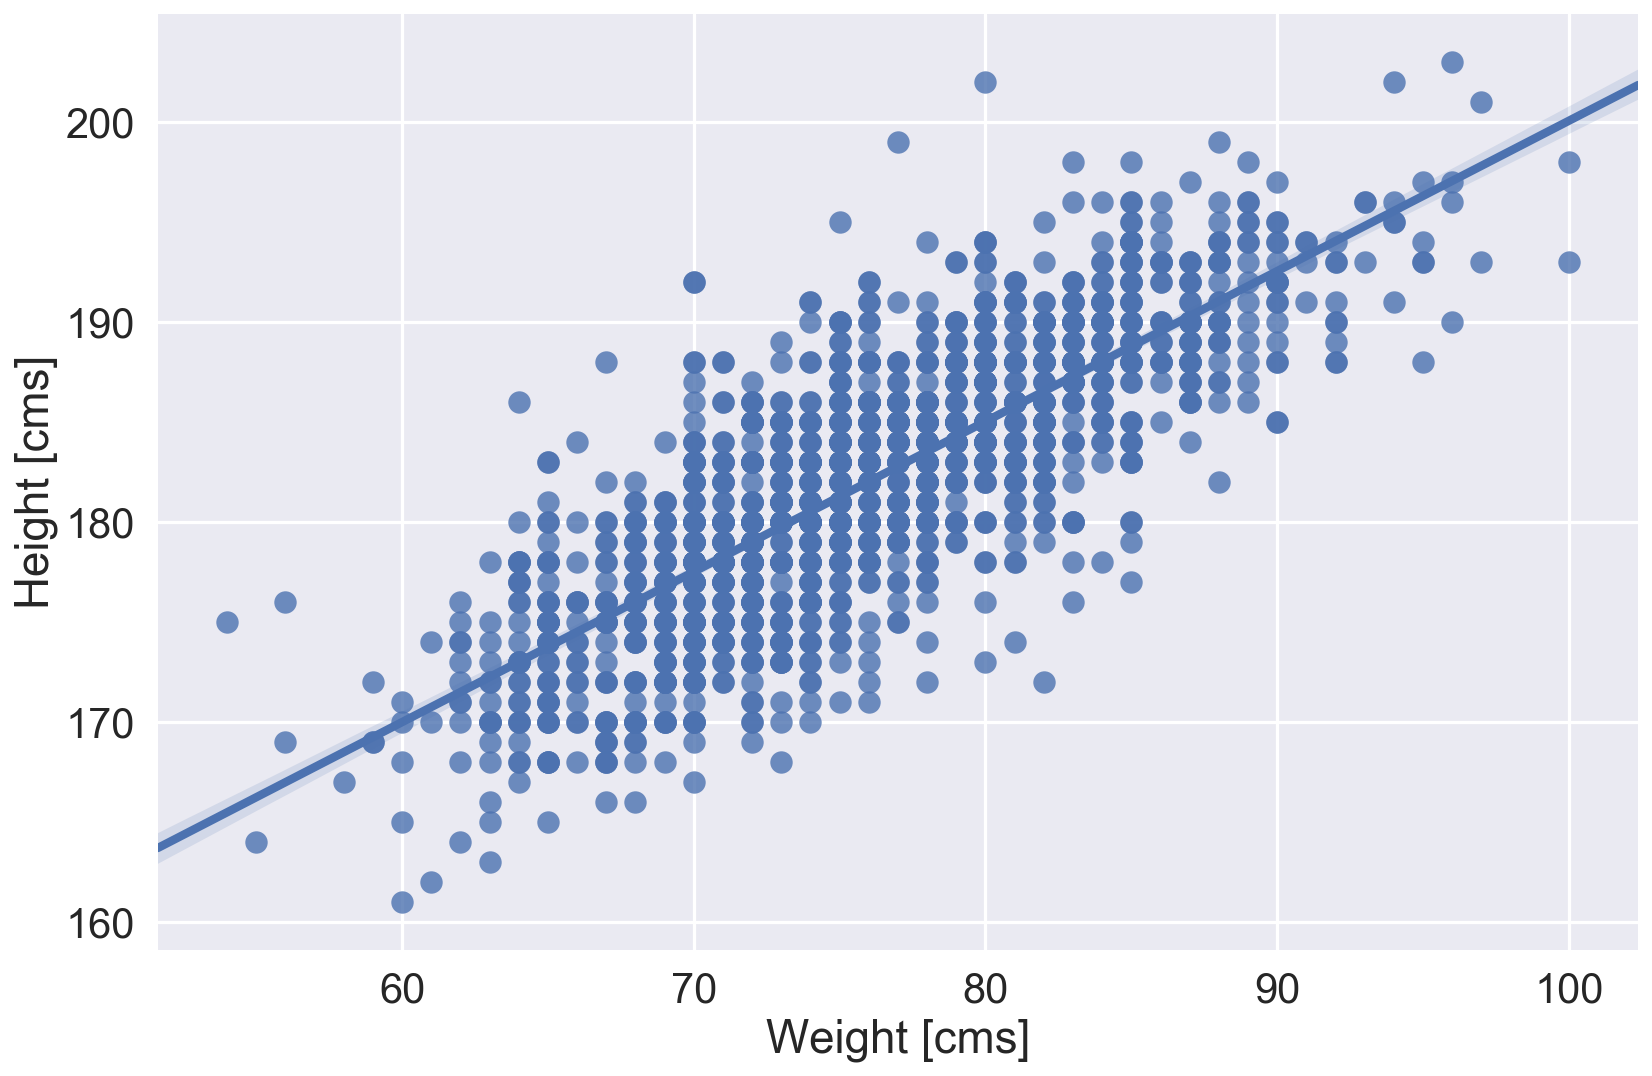

In [35]:
#using sns
MIDSIZE=(12,8)
fig,ax=plt.subplots(figsize=MIDSIZE)
sns.regplot('weight','height',data=playerNotNullRaters,ax=ax)
ax.set_ylabel('Height [cms]')
ax.set_xlabel('Weight [cms]')
fig.tight_layout()

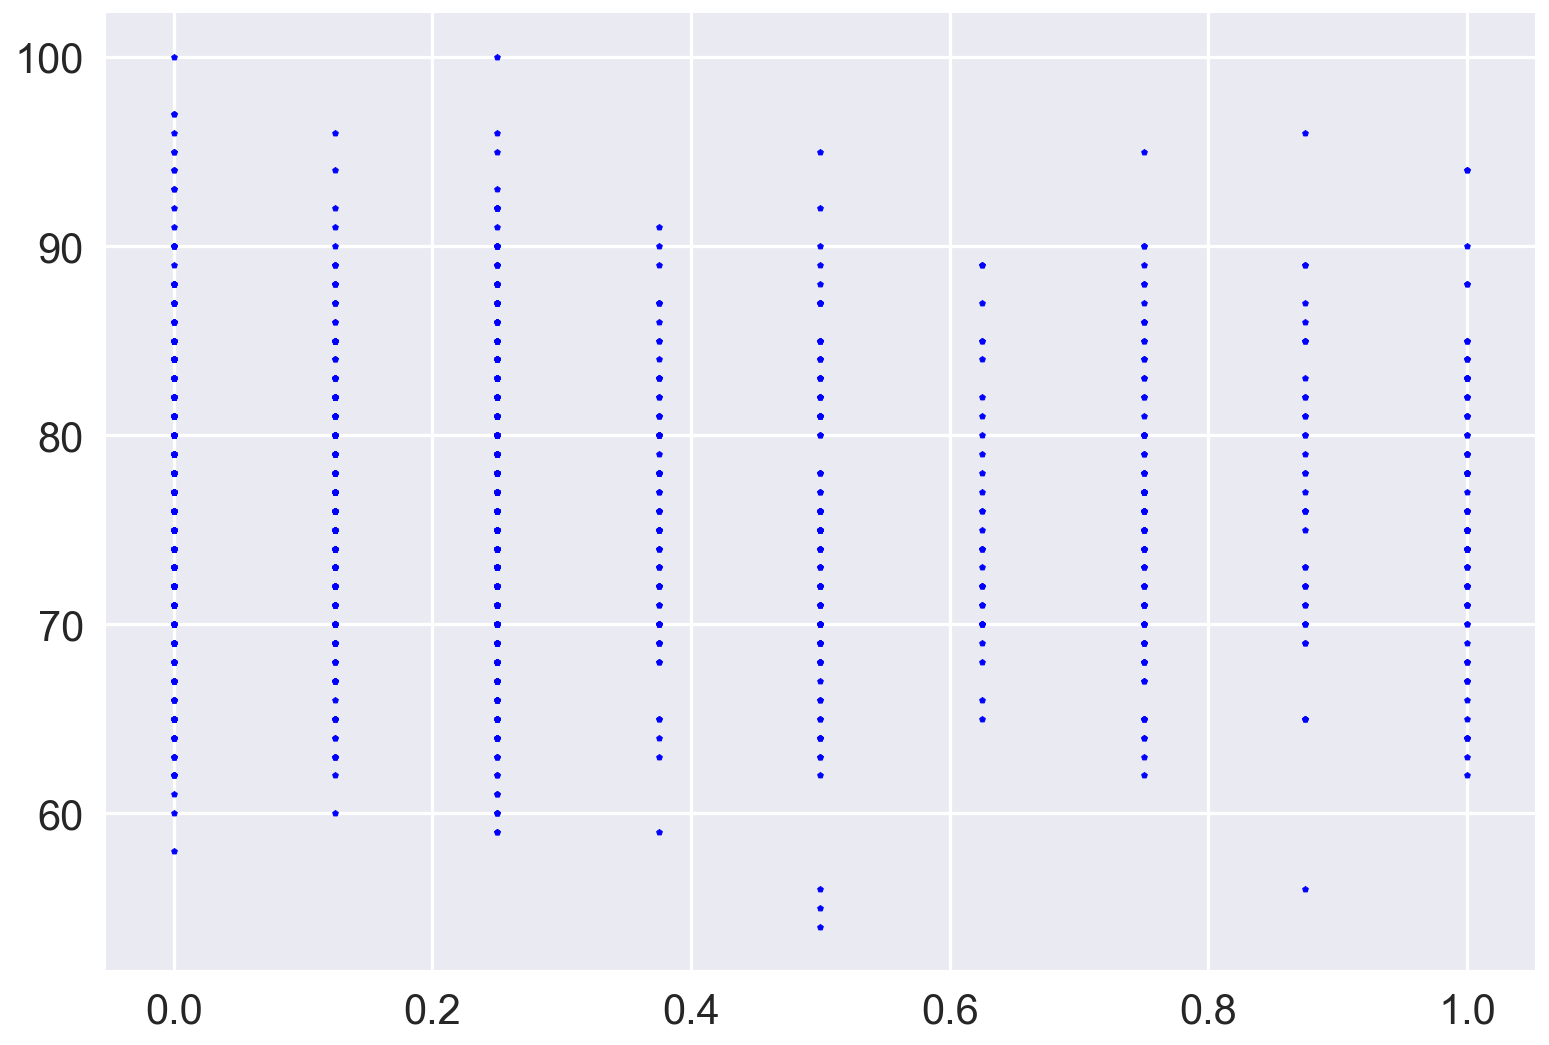

In [36]:
plt.scatter(playerNotNullRaters['SkinTone'],playerNotNullRaters['weight'],color='b',marker='p',s=9)

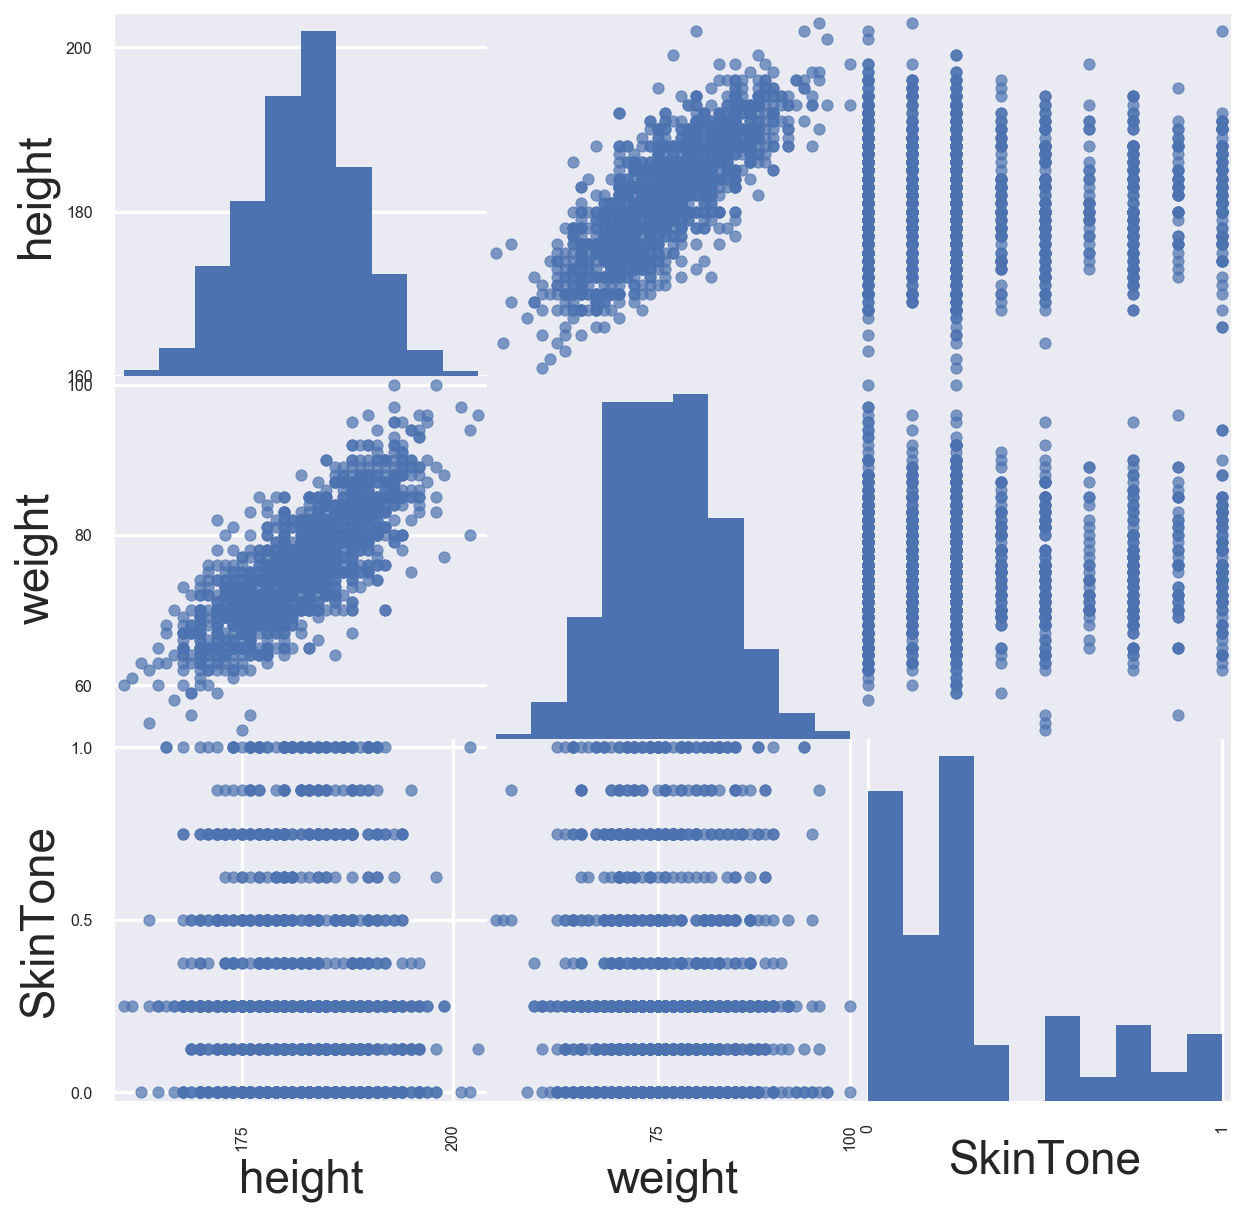

In [37]:
from pandas.tools.plotting import scatter_matrix

MIDSIZE=(10,10)
fig,ax=plt.subplots(figsize=MIDSIZE)
scatter_matrix(playerNotNullRaters[['height','weight','SkinTone']],alpha=0.7,diagonal='hist',ax=ax);

#fig, ax = plt.subplots(figsize=(12, 8))
#scatter_matrix(playerNotNullRaters[['height', 'weight', 'SkinTone']], alpha=0.2, diagonal='hist', ax=ax);

In [38]:
#Create hieght categories
height_categories=['low_height','vlow_height','mid_height','high_height','vhigh_height']

In [39]:
# use qcut function of pandas to group the player based on the hieghts
# qcut is uses for discretization.

#qcut(dataframe,number of bins,range)
playerNotNullRaters['heightclass']=pd.qcut(playerNotNullRaters['height'],len(height_categories),height_categories)

In [40]:
playerNotNullRaters.head(100)

birthday  height  weight              position  \
playerShort                                                                
aaron-hughes            08.11.1979   182.0    71.0           Center Back   
aaron-hunt              04.09.1986   183.0    73.0  Attacking Midfielder   
aaron-lennon            16.04.1987   165.0    63.0      Right Midfielder   
aaron-ramsey            26.12.1990   178.0    76.0     Center Midfielder   
abdelhamid-el-kaoutari  17.03.1990   180.0    73.0           Center Back   
abdou-traore_2          17.01.1988   180.0    74.0      Right Midfielder   
abdoulaye-diallo_2      30.03.1992   189.0    80.0            Goalkeeper   
abdoulaye-keita_2       19.08.1990   188.0    83.0            Goalkeeper   
abdoulwhaid-sissoko     20.03.1990   180.0    68.0  Defensive Midfielder   
abdul-rahman-baba       02.07.1994   179.0    70.0         Left Fullback   
abdul-razak             11.11.1992   180.0    78.0     Center Midfielder   
abel-aguilar            06.01.1985   185.0    78.0  Defensive Midfielder   
abelaziz-barrada        19.06.1989   185.0    78.0                   NaN   
abou-diaby              11.05.1986   188.0    75.0     Center Midfielder   
adam-bodzek             07.09.1985   184.0    79.0  Defensive Midfielder   
adam-campbell           01.01.1995   168.0     NaN                   NaN   
adam-federici           31.01.1985   188.0    90.0            Goalkeeper   
adam-hlousek            20.12.1988   188.0    76.0       Left Midfielder   
adam-johnson            14.07.1987   175.0    62.0       Left Midfielder   
adam-morgan             21.04.1994   179.0     NaN                   NaN   
adam-pinter             12.06.1988   190.0    76.0           Center Back   
adam-smith_3            29.04.1991   173.0    73.0        Right Fullback   
adam-szalai             09.12.1987   193.0    87.0        Center Forward   
adan                    13.05.1987   190.0    88.0            Goalkeeper   
adel-taarabt            24.05.1989   180.0    78.0       Left Midfielder   
adil-rami               27.12.1985   190.0    88.0           Center Back   
adrian-colunga          17.11.1984   171.0    69.0        Center Forward   
adrian-mutu             08.01.1979   180.0    74.0           Left Winger   
adrian_2                08.01.1988   183.0    73.0        Center Forward   
adrian_7                21.05.1983   188.0    82.0            Goalkeeper   
...                            ...     ...     ...                   ...   
alhassane-bangoura      30.09.1992   174.0    68.0      Right Midfielder   
aliosman-aydin          06.02.1992   178.0    77.0                   NaN   
allan-nyom              10.05.1988   186.0    81.0                   NaN   
almog-cohen             01.09.1988   169.0    68.0  Defensive Midfielder   
alou-diarra             15.07.1981   190.0    79.0  Defensive Midfielder   
alphonse-areola         27.02.1993   190.0    88.0            Goalkeeper   
alvaro-gonzalez_3       08.01.1990   183.0    76.0           Center Back   
alvaro-negredo          20.08.1985   186.0    87.0        Center Forward   
alvaro-rubio            18.04.1979   178.0    80.0  Defensive Midfielder   
alvaro-vadillo          12.09.1994   180.0    69.0           Left Winger   
alvaro_10               27.04.1991   182.0    71.0        Center Forward   
alvaro_8                19.05.1991   182.0    80.0        Center Forward   
aly-cissokho            15.09.1987   181.0    75.0         Left Fullback   
amaya_3                 31.05.1983   192.0    86.0           Center Back   
amin-younes             06.08.1993   168.0    67.0      Right Midfielder   
ammar-jemal             20.04.1987   186.0    81.0         Left Fullback   
amorebieta              29.03.1985   192.0    85.0           Center Back   
anatoliy-tymoshchuk     30.03.1979   181.0    75.0  Defensive Midfielder   
ander-herrera           14.08.1989   182.0    73.0  Attacking Midfielder   
anders-lindegaard       13.04.1984   193.0    80.0            Goalkeeper  

In [41]:
playerNotNullRaters['heightclass'].value_counts()

low_height      344
vlow_height     329
mid_height      319
high_height     317
vhigh_height    273
Name: heightclass, dtype: int64

In [42]:
playerNotNullRaters.head(50)

birthday  height  weight              position  \
playerShort                                                                 
aaron-hughes             08.11.1979   182.0    71.0           Center Back   
aaron-hunt               04.09.1986   183.0    73.0  Attacking Midfielder   
aaron-lennon             16.04.1987   165.0    63.0      Right Midfielder   
aaron-ramsey             26.12.1990   178.0    76.0     Center Midfielder   
abdelhamid-el-kaoutari   17.03.1990   180.0    73.0           Center Back   
abdou-traore_2           17.01.1988   180.0    74.0      Right Midfielder   
abdoulaye-diallo_2       30.03.1992   189.0    80.0            Goalkeeper   
abdoulaye-keita_2        19.08.1990   188.0    83.0            Goalkeeper   
abdoulwhaid-sissoko      20.03.1990   180.0    68.0  Defensive Midfielder   
abdul-rahman-baba        02.07.1994   179.0    70.0         Left Fullback   
abdul-razak              11.11.1992   180.0    78.0     Center Midfielder   
abel-aguilar             06.01.1985   185.0    78.0  Defensive Midfielder   
abelaziz-barrada         19.06.1989   185.0    78.0                   NaN   
abou-diaby               11.05.1986   188.0    75.0     Center Midfielder   
adam-bodzek              07.09.1985   184.0    79.0  Defensive Midfielder   
adam-campbell            01.01.1995   168.0     NaN                   NaN   
adam-federici            31.01.1985   188.0    90.0            Goalkeeper   
adam-hlousek             20.12.1988   188.0    76.0       Left Midfielder   
adam-johnson             14.07.1987   175.0    62.0       Left Midfielder   
adam-morgan              21.04.1994   179.0     NaN                   NaN   
adam-pinter              12.06.1988   190.0    76.0           Center Back   
adam-smith_3             29.04.1991   173.0    73.0        Right Fullback   
adam-szalai              09.12.1987   193.0    87.0        Center Forward   
adan                     13.05.1987   190.0    88.0            Goalkeeper   
adel-taarabt             24.05.1989   180.0    78.0       Left Midfielder   
adil-rami                27.12.1985   190.0    88.0           Center Back   
adrian-colunga           17.11.1984   171.0    69.0        Center Forward   
adrian-mutu              08.01.1979   180.0    74.0           Left Winger   
adrian_2                 08.01.1988   183.0    73.0        Center Forward   
adrian_7                 21.05.1983   188.0    82.0            Goalkeeper   
adriano_24               26.10.1984   172.0    67.0       Left Midfielder   
adrien-rabiot            03.04.1995   188.0    71.0  Defensive Midfielder   
aduriz                   11.02.1981   182.0    78.0        Center Forward   
agirretxe                24.02.1987   187.0    77.0        Center Forward   
ahmed-kantari            28.06.1985   185.0    78.0                   NaN   
ahmed-sassi              24.09.1993   179.0    69.0  Attacking Midfielder   
alain-traore_2           31.12.1988   176.0    66.0       Left Midfielder   
alaixys-romao            18.01.1984   180.0    74.0  Defensive Midfielder   
alassane-plea            10.03.1993   180.0    65.0                   NaN   
albelda                  01.09.1977   181.0    77.0  Defensive Midfielder   
alberto-botia            27.01.1989   186.0    82.0           Center Back   
alberto-perea            19.12.1990   177.0    68.0                   NaN   
alejandro-alonso         03.03.1982   170.0    68.0      Right Midfielder   
alejandro-dominguez_2    10.06.1981   175.0    73.0          Right Winger   
aleksandar-ignjovski     27.01.1991   175.0    68.0  Defensive Midfielder   
aleksandar-kolarov       10.11.1985   187.0    80.0         Left Fullback   
aleksandar-stevanovic    16.02.1992   175.0    65.0                   NaN   
alex-lopez               11.01.1988   174.0    66.0     Center Midfielder   
alex-nimely-tchuimeni    11.05.1991   180.0    72.0        Center Forward   
alex-oxlade-chamberlain  15.08.1993   180.0    70.0                   NaN   

                      

In [47]:
# Now categorizing the skin tones
SkintoneRatings_categories=['white','brown','black']
playerNotNullRaters['skintoneclass']=pd.qcut(playerNotNullRaters['SkinTone'],len(SkintoneRatings_categories),SkintoneRatings_categories)
playerNotNullRaters

birthday  height  weight              position  \
playerShort                                                                
aaron-hughes            08.11.1979   182.0    71.0           Center Back   
aaron-hunt              04.09.1986   183.0    73.0  Attacking Midfielder   
aaron-lennon            16.04.1987   165.0    63.0      Right Midfielder   
aaron-ramsey            26.12.1990   178.0    76.0     Center Midfielder   
abdelhamid-el-kaoutari  17.03.1990   180.0    73.0           Center Back   
abdou-traore_2          17.01.1988   180.0    74.0      Right Midfielder   
abdoulaye-diallo_2      30.03.1992   189.0    80.0            Goalkeeper   
abdoulaye-keita_2       19.08.1990   188.0    83.0            Goalkeeper   
abdoulwhaid-sissoko     20.03.1990   180.0    68.0  Defensive Midfielder   
abdul-rahman-baba       02.07.1994   179.0    70.0         Left Fullback   
abdul-razak             11.11.1992   180.0    78.0     Center Midfielder   
abel-aguilar            06.01.1985   185.0    78.0  Defensive Midfielder   
abelaziz-barrada        19.06.1989   185.0    78.0                   NaN   
abou-diaby              11.05.1986   188.0    75.0     Center Midfielder   
adam-bodzek             07.09.1985   184.0    79.0  Defensive Midfielder   
adam-campbell           01.01.1995   168.0     NaN                   NaN   
adam-federici           31.01.1985   188.0    90.0            Goalkeeper   
adam-hlousek            20.12.1988   188.0    76.0       Left Midfielder   
adam-johnson            14.07.1987   175.0    62.0       Left Midfielder   
adam-morgan             21.04.1994   179.0     NaN                   NaN   
adam-pinter             12.06.1988   190.0    76.0           Center Back   
adam-smith_3            29.04.1991   173.0    73.0        Right Fullback   
adam-szalai             09.12.1987   193.0    87.0        Center Forward   
adan                    13.05.1987   190.0    88.0            Goalkeeper   
adel-taarabt            24.05.1989   180.0    78.0       Left Midfielder   
adil-rami               27.12.1985   190.0    88.0           Center Back   
adrian-colunga          17.11.1984   171.0    69.0        Center Forward   
adrian-mutu             08.01.1979   180.0    74.0           Left Winger   
adrian_2                08.01.1988   183.0    73.0        Center Forward   
adrian_7                21.05.1983   188.0    82.0            Goalkeeper   
...                            ...     ...     ...                   ...   
xisco_2                 26.06.1986   188.0    85.0        Center Forward   
yacine-brahimi          08.02.1990   175.0    65.0  Attacking Midfielder   
yann-mvila              26.06.1990   169.0    56.0  Defensive Midfielder   
yannick-djalo           05.05.1986   171.0    62.0        Center Forward   
yannik-schulze          05.02.1995   186.0    77.0           Center Back   
yassine-benzia          08.09.1994   179.0    71.0                   NaN   
yassine-el-ghanassi     12.07.1990   173.0     NaN           Left Winger   
yassine-jebbour         24.08.1991   181.0    70.0         Left Fullback   
yaya-toure              13.05.1983   191.0    90.0  Defensive Midfielder   
yoan-gouffran           25.05.1986   175.0    70.0          Right Winger   
yoann-gourcuff          11.07.1986   185.0    79.0  Attacking Midfielder   
yohan-cabaye            14.01.1986   175.0    69.0  Defensive Midfielder   
yohandry-orozco         19.03.1991   164.0    55.0  Attacking Midfielder   
yossi-benayoun          05.05.1980   178.0    70.0  Attacking Midfielder   
younes-belhanda         25.02.1990   174.0    75.0  Attacking Midfielder   
younes-kaboul           04.01.1986   190.0    87.0           Center Back   
youssef-el-arabi        03.02.1987   180.0    75.0        Center Forward   
yunus-malli             24.02.1992   179.0    70.0  Attacking Midfielder   
zdenk-pospch            14.12.1978   174.0    72.0        Right Fullback   
zdravko-kuzmanovic      22.09.1987   186.0    71.0  Defensive Midfielder  

In [48]:
playerNotNullRaters['skintoneclass'].value_counts()

white    651
brown    472
black    462
Name: skintoneclass, dtype: int64

In [49]:
playerNotNullRaters.head(100)

birthday  height  weight              position  \
playerShort                                                                
aaron-hughes            08.11.1979   182.0    71.0           Center Back   
aaron-hunt              04.09.1986   183.0    73.0  Attacking Midfielder   
aaron-lennon            16.04.1987   165.0    63.0      Right Midfielder   
aaron-ramsey            26.12.1990   178.0    76.0     Center Midfielder   
abdelhamid-el-kaoutari  17.03.1990   180.0    73.0           Center Back   
abdou-traore_2          17.01.1988   180.0    74.0      Right Midfielder   
abdoulaye-diallo_2      30.03.1992   189.0    80.0            Goalkeeper   
abdoulaye-keita_2       19.08.1990   188.0    83.0            Goalkeeper   
abdoulwhaid-sissoko     20.03.1990   180.0    68.0  Defensive Midfielder   
abdul-rahman-baba       02.07.1994   179.0    70.0         Left Fullback   
abdul-razak             11.11.1992   180.0    78.0     Center Midfielder   
abel-aguilar            06.01.1985   185.0    78.0  Defensive Midfielder   
abelaziz-barrada        19.06.1989   185.0    78.0                   NaN   
abou-diaby              11.05.1986   188.0    75.0     Center Midfielder   
adam-bodzek             07.09.1985   184.0    79.0  Defensive Midfielder   
adam-campbell           01.01.1995   168.0     NaN                   NaN   
adam-federici           31.01.1985   188.0    90.0            Goalkeeper   
adam-hlousek            20.12.1988   188.0    76.0       Left Midfielder   
adam-johnson            14.07.1987   175.0    62.0       Left Midfielder   
adam-morgan             21.04.1994   179.0     NaN                   NaN   
adam-pinter             12.06.1988   190.0    76.0           Center Back   
adam-smith_3            29.04.1991   173.0    73.0        Right Fullback   
adam-szalai             09.12.1987   193.0    87.0        Center Forward   
adan                    13.05.1987   190.0    88.0            Goalkeeper   
adel-taarabt            24.05.1989   180.0    78.0       Left Midfielder   
adil-rami               27.12.1985   190.0    88.0           Center Back   
adrian-colunga          17.11.1984   171.0    69.0        Center Forward   
adrian-mutu             08.01.1979   180.0    74.0           Left Winger   
adrian_2                08.01.1988   183.0    73.0        Center Forward   
adrian_7                21.05.1983   188.0    82.0            Goalkeeper   
...                            ...     ...     ...                   ...   
alhassane-bangoura      30.09.1992   174.0    68.0      Right Midfielder   
aliosman-aydin          06.02.1992   178.0    77.0                   NaN   
allan-nyom              10.05.1988   186.0    81.0                   NaN   
almog-cohen             01.09.1988   169.0    68.0  Defensive Midfielder   
alou-diarra             15.07.1981   190.0    79.0  Defensive Midfielder   
alphonse-areola         27.02.1993   190.0    88.0            Goalkeeper   
alvaro-gonzalez_3       08.01.1990   183.0    76.0           Center Back   
alvaro-negredo          20.08.1985   186.0    87.0        Center Forward   
alvaro-rubio            18.04.1979   178.0    80.0  Defensive Midfielder   
alvaro-vadillo          12.09.1994   180.0    69.0           Left Winger   
alvaro_10               27.04.1991   182.0    71.0        Center Forward   
alvaro_8                19.05.1991   182.0    80.0        Center Forward   
aly-cissokho            15.09.1987   181.0    75.0         Left Fullback   
amaya_3                 31.05.1983   192.0    86.0           Center Back   
amin-younes             06.08.1993   168.0    67.0      Right Midfielder   
ammar-jemal             20.04.1987   186.0    81.0         Left Fullback   
amorebieta              29.03.1985   192.0    85.0           Center Back   
anatoliy-tymoshchuk     30.03.1979   181.0    75.0  Defensive Midfielder   
ander-herrera           14.08.1989   182.0    73.0  Attacking Midfielder   
anders-lindegaard       13.04.1984   193.0    80.0            Goalkeeper  

In [50]:
# let us add age and formated date

In [55]:
playerNotNullRaters['birth_date'] = pd.to_datetime(playerNotNullRaters.birthday,format='%d.%m.%Y')
#playerNotNullRaters['birth_date'] = pd.to_datetime(playerNotNullRaters.birthday, format='%d.%m.%Y')

In [60]:
# calculate the age from today
from datetime import datetime
datetime.now()
playerNotNullRaters['age_years']=(datetime.now()-playerNotNullRaters['birth_date']).dt.days/365

In [62]:
# round the ages
playerNotNullRaters['age_years']=playerNotNullRaters.age_years.round()

In [65]:
playerNotNullRaters.head(10)

birthday  height  weight              position  \
playerShort                                                                
aaron-hughes            08.11.1979   182.0    71.0           Center Back   
aaron-hunt              04.09.1986   183.0    73.0  Attacking Midfielder   
aaron-lennon            16.04.1987   165.0    63.0      Right Midfielder   
aaron-ramsey            26.12.1990   178.0    76.0     Center Midfielder   
abdelhamid-el-kaoutari  17.03.1990   180.0    73.0           Center Back   
abdou-traore_2          17.01.1988   180.0    74.0      Right Midfielder   
abdoulaye-diallo_2      30.03.1992   189.0    80.0            Goalkeeper   
abdoulaye-keita_2       19.08.1990   188.0    83.0            Goalkeeper   
abdoulwhaid-sissoko     20.03.1990   180.0    68.0  Defensive Midfielder   
abdul-rahman-baba       02.07.1994   179.0    70.0         Left Fullback   

                        rater1  rater2  SkinTone position_agg   heightclass  \
playerShort                                                                   
aaron-hughes              0.25    0.00     0.125      Defense    mid_height   
aaron-hunt                0.00    0.25     0.125     Attacker    mid_height   
aaron-lennon              0.25    0.25     0.250     Midfield    low_height   
aaron-ramsey              0.00    0.00     0.000     Midfield   vlow_height   
abdelhamid-el-kaoutari    0.25    0.25     0.250      Defense   vlow_height   
abdou-traore_2            0.75    0.75     0.750     Midfield   vlow_height   
abdoulaye-diallo_2        0.75    1.00     0.875      Defense  vhigh_height   
abdoulaye-keita_2         0.75    1.00     0.875      Defense   high_height   
abdoulwhaid-sissoko       1.00    1.00     1.000      Defense   vlow_height   
abdul-rahman-baba         0.75    1.00     0.875      Defense   vlow_height   

                       skintoneclass birth_date  age_years  
playerShort                                                 
aaron-hughes                   white 1979-11-08       39.0  
aaron-hunt                     white 1986-09-04       32.0  
aaron-lennon                   brown 1987-04-16       31.0  
aaron-ramsey                   white 1990-12-26       28.0  
abdelhamid-el-kaoutari         brown 1990-03-17       28.0  
abdou-traore_2                 black 1988-01-17       31.0  
abdoulaye-diallo_2             black 1992-03-30       26.0  
abdoulaye-keita_2              black 1990-08-19       28.0  
abdoulwhaid-sissoko            black 1990-03-20       28.0  
abdul-rahman-baba              black 1994-07-02       24.0

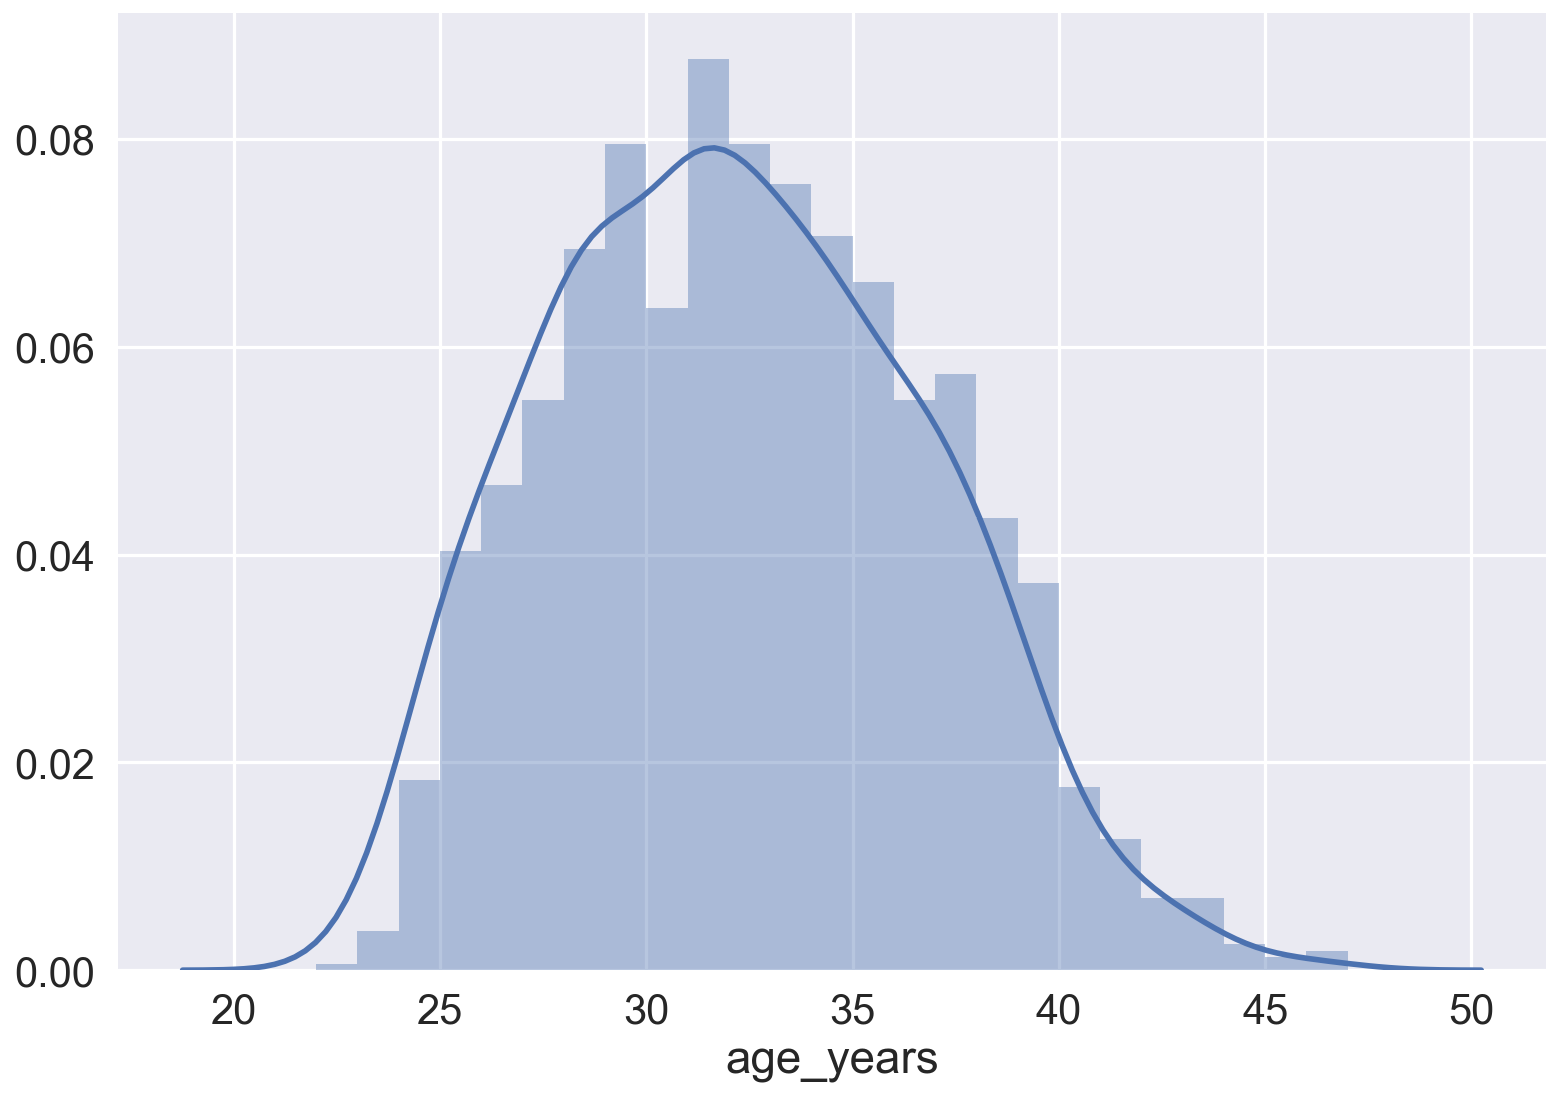

In [66]:
sns.distplot(playerNotNullRaters.age_years);

## Pandas profiling

There is a library that gives a high level overview -- https://github.com/JosPolfliet/pandas-profiling

In [67]:
pandas_profiling.ProfileReport(playerNotNullRaters)

In [68]:
players_cleaned_variables = playerNotNullRaters.columns.tolist()
players_cleaned_variables

['birthday',
 'height',
 'weight',
 'position',
 'rater1',
 'rater2',
 'SkinTone',
 'position_agg',
 'heightclass',
 'skintoneclass',
 'birth_date',
 'age_years']

In [69]:
players_cleaned_variables=[
    #'birthday',
 'height',
 'weight',
 #'position',
 #'rater1',
 #'rater2',
 'SkinTone',
 'position_agg',
 'heightclass',
 'skintoneclass',
 'birth_date',
 'age_years']

In [71]:
pandas_profiling.ProfileReport(playerNotNullRaters[players_cleaned_variables])

In [72]:
playerNotNullRaters[players_cleaned_variables].to_csv("cleaned_players.csv.gz", compression='gzip')